# GTI770 - Systèmes intelligents et apprentissage machine

#### Alessandro L. Koerich

### Notebook Jupyter - 6_Bayes_Multinomial - Letter Dataset 

### Holdout (train/test split)
### k-fold Cross-validation (k-fold CV)
### Leave-one-out Cross-validation (LOOCV)

##### Created: May 2018
##### Revised: January 2019

------
### Title: Letter Image Recognition Data 

* #### Relevant Information:

   The objective is to identify each of a large number of black-and-white
   rectangular pixel displays as one of the 26 capital letters in the English
   alphabet. The character images were based on 20 different fonts and each
   letter within these 20 fonts was randomly distorted to produce a file of
   20,000 unique stimuli. Each stimulus was converted into 16 primitive
   numerical attributes (statistical moments and edge counts) which were then
   scaled to fit into a range of integer values from 0 through 15.  We
   typically train on the first 16,000 items and then use the resulting model
   to predict the letter category for the remaining 4,000.

* #### Number of Instances: 20,000

* #### Number of Attributes: 17 (Letter category and 16 numeric features)

* #### Attribute Information:
	 1.	lettr	capital letter	(26 values from A to Z)
	 2.	x-box	horizontal position of box	(integer)
	 3.	y-box	vertical position of box	(integer)
	 4.	width	width of box			(integer)
	 5.	high 	height of box			(integer)
	 6.	onpix	total # on pixels		(integer)
	 7.	x-bar	mean x of on pixels in box	(integer)
	 8.	y-bar	mean y of on pixels in box	(integer)
	 9.	x2bar	mean x variance			(integer)
	10.	y2bar	mean y variance			(integer)
	11.	xybar	mean x y correlation		(integer)
	12.	x2ybr	mean of x * x * y		(integer)
	13.	xy2br	mean of x * y * y		(integer)
	14.	x-ege	mean edge count left to right	(integer)
	15.	xegvy	correlation of x-ege with y	(integer)
	16.	y-ege	mean edge count bottom to top	(integer)
	17.	yegvx	correlation of y-ege with x	(integer)

* #### Missing Attribute Values: None

* #### Class Distribution:
 	789 A	   766 B     736 C     805 D	 768 E	   775 F     773 G
 	734 H	   755 I     747 J     739 K	 761 L	   792 M     783 N
 	753 O	   803 P     783 Q     758 R	 748 S	   796 T     813 U
 	764 V	   752 W     787 X     786 Y	 734 Z
----

In [1]:
# Imports
import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

### Nominal labels - Scikit-learn will fail...

In [2]:
# Load data from file

num_features = 16
data = np.loadtxt("CSV_Files/letter.arff.csv", delimiter="," , skiprows=1)

# This will give you and error, because the features are numeric, bu the class label are NOMINAL!
# Therefore, we need to preprocess the data to convert it to NUMERICAL label.
# Give a look at the "3 - préparation de données et extraction de primitives" slides to see how
# to do it.

ValueError: could not convert string to float: 'Z'

### Labels converted from nominal to numerical (binary approach) - Scikit-learn will work...

In [3]:
# Load data from file (converted from nominal to numerical (binary approach))

num_features = 16
data = np.loadtxt("CSV_Files/letter_classnumeric.arff.csv", delimiter=",", skiprows=1)

# We need to skip the first line of the file, since it is just the column names (header)

In [4]:
data.shape

(20000, 17)

In [5]:
data

array([[ 2.,  4.,  4., ...,  5.,  6., 26.],
       [ 4.,  7.,  5., ...,  7., 10., 16.],
       [ 7., 10.,  8., ...,  5., 10., 19.],
       ...,
       [ 4.,  8.,  4., ...,  3.,  7., 15.],
       [ 4., 11.,  4., ...,  0.,  8., 12.],
       [ 5.,  9.,  6., ...,  6.,  8., 17.]])

In [6]:
# Define the training set and separate inputs (features) from outputs (labels)

# input
X_data  = data[:,0:num_features]

# output
Y_data  = data[:,num_features] # last column = class labels

In [7]:
X_data.shape, Y_data.shape

((20000, 16), (20000,))

In [8]:
X_data
# 16 columns = inputs

array([[ 2.,  4.,  4., ...,  8.,  5.,  6.],
       [ 4.,  7.,  5., ...,  9.,  7., 10.],
       [ 7., 10.,  8., ...,  5.,  5., 10.],
       ...,
       [ 4.,  8.,  4., ...,  9.,  3.,  7.],
       [ 4., 11.,  4., ...,  8.,  0.,  8.],
       [ 5.,  9.,  6., ...,  8.,  6.,  8.]])

In [9]:
Y_data
# last column = output = class labels

array([26., 16., 19., ..., 15., 12., 17.])

## Scikit-Learn Naïve Bayes Documentation

* http://scikit-learn.org/stable/modules/naive_bayes.html

* http://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes

## Decide on the Probability Distribution

Now that we have our data ready to train your model, we need first to choose the appropriate probability distribution to model/represent the data.
 
Which probability distributions should we use?

### 1. Bernoulli distribution: discrete features, 2 possible states (binary features).
### 2. Multinomial dsitribution: discrete features, 3 or more possible states (n-ary features).
### 3. Normal distribution: real-value features.



If you choose:

#### 1. BernoulliNB:
implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions; i.e., there may be multiple features but each one is assumed to be a binary-valued (Bernoulli, boolean) variable.
        
#### 2. MultinomialNB:
implements the naive Bayes algorithm for multinomially distributed data, where the data are typically represented as counts.
        
#### 3. GaussianNB:
implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian.

In [30]:
# Train the Bayesian model with the training set
# model = BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
# model = MultinomialNB(fit_prior=True)

model = GaussianNB()
model = model.fit(X_data, Y_data)

In [31]:
# Show all parameters of the model Multinomial NB
# You can change all these parameters
# See the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

model

GaussianNB(priors=None, var_smoothing=1e-09)

In [32]:
# Use the model to predict the class of samples
# Notice that we are testing the train dataset

Y_data_pred = model.predict( X_data )

# Get the predictions (class labels)
Y_data_pred

array([26.,  7., 19., ..., 15., 12., 17.])

In [33]:
# You can also predict the probability of each class
# train dataset

Y_data_pred_prob = model.predict_proba(X_data)

# Get the predictions (class probabilities, a vector of 26 probabilities, one for each class)
Y_data_pred_prob

array([[2.8e-11, 2.5e-05, 6.0e-05, ..., 3.1e-02, 1.8e-05, 7.2e-01],
       [5.3e-08, 1.8e-03, 9.8e-02, ..., 1.7e-04, 1.4e-04, 3.0e-03],
       [2.7e-09, 2.8e-06, 9.2e-06, ..., 1.5e-01, 6.8e-16, 3.8e-03],
       ...,
       [9.4e-08, 4.7e-03, 5.8e-04, ..., 3.3e-04, 6.7e-05, 3.0e-05],
       [1.5e-10, 6.0e-30, 1.0e-22, ..., 2.3e-25, 5.8e-18, 4.4e-23],
       [2.1e-07, 2.4e-08, 7.5e-04, ..., 7.4e-05, 1.7e-07, 2.5e-05]])

In [34]:
# Evaluation metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [35]:
acc_letter_data = accuracy_score(Y_data, Y_data_pred )
print("Correct classification rate for the whole dataset = "+str(acc_letter_data*100)+"%")

Correct classification rate for the whole dataset = 64.535%


In [36]:
# Evaluation metrics

from sklearn.metrics import classification_report

In [37]:
target_names = ['A', 'B', 'C', 'D', 'E', 'F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
print( classification_report(Y_data, Y_data_pred, target_names=target_names))

              precision    recall  f1-score   support

           A       0.84      0.87      0.86       789
           B       0.50      0.70      0.58       766
           C       0.77      0.75      0.76       736
           D       0.61      0.71      0.66       805
           E       0.61      0.36      0.45       768
           F       0.71      0.74      0.72       775
           G       0.55      0.54      0.55       773
           H       0.54      0.31      0.40       734
           I       0.53      0.77      0.63       755
           J       0.82      0.73      0.77       747
           K       0.49      0.47      0.48       739
           L       0.96      0.76      0.85       761
           M       0.66      0.90      0.76       792
           N       0.87      0.70      0.77       783
           O       0.48      0.73      0.58       753
           P       0.88      0.74      0.80       803
           Q       0.58      0.54      0.56       783
           R       0.60    

In [38]:
# Confusion matrix

cm_letter_data = confusion_matrix(Y_data, Y_data_pred )
cm_letter_data

array([[690,   0,   0,   0,   0,   0,   0,   6,   0,   2,   7,   0,  21,
         11,   0,   0,   6,   3,  27,   0,   2,   0,   3,   4,   7,   0],
       [  0, 535,   0,  29,   0,   1,   9,   7,  73,   4,   9,   0,  17,
          0,   2,   0,   7,  49,   8,   0,   0,   0,  11,   5,   0,   0],
       [  0,   0, 551,   0,  19,   1,  42,   1,   0,   0,  55,   0,   6,
          0,  16,   2,  11,   1,  14,  10,   6,   1,   0,   0,   0,   0],
       [ 10,  64,   0, 570,   0,   1,   0,   4,  39,  14,  14,   0,   7,
          1,  27,   2,   0,  31,  19,   0,   0,   0,   0,   2,   0,   0],
       [  0,  10,  10,   2, 278,   1, 118,   3,  60,   0,  32,   0,   0,
          0,   0,   0,  49,   3,  45,  15,   6,   0,   2, 112,   3,  19],
       [  0,  36,   0,  22,   0, 571,  15,   2,   4,   0,   0,   0,   2,
         11,   0,  31,  21,   4,  18,  17,   0,   0,   6,   9,   6,   0],
       [ 12,  17, 131,  12,   1,   1, 420,   4,  11,   0,  17,   0,  16,
          1,  12,   0,  57,  16,  18,   0,   

In [39]:
import itertools
import matplotlib.pyplot as plt

In [40]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize=(20,20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect = 'auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [41]:
np.set_printoptions(precision=1)

In [42]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm_letter_data, classes= ['A', 'B', 'C', 'D', 'E', 'F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'],
                      title='Confusion matrix, without normalization')

Confusion matrix, without normalization
[[690   0   0   0   0   0   0   6   0   2   7   0  21  11   0   0   6   3
   27   0   2   0   3   4   7   0]
 [  0 535   0  29   0   1   9   7  73   4   9   0  17   0   2   0   7  49
    8   0   0   0  11   5   0   0]
 [  0   0 551   0  19   1  42   1   0   0  55   0   6   0  16   2  11   1
   14  10   6   1   0   0   0   0]
 [ 10  64   0 570   0   1   0   4  39  14  14   0   7   1  27   2   0  31
   19   0   0   0   0   2   0   0]
 [  0  10  10   2 278   1 118   3  60   0  32   0   0   0   0   0  49   3
   45  15   6   0   2 112   3  19]
 [  0  36   0  22   0 571  15   2   4   0   0   0   2  11   0  31  21   4
   18  17   0   0   6   9   6   0]
 [ 12  17 131  12   1   1 420   4  11   0  17   0  16   1  12   0  57  16
   18   0   0   0  24   3   0   0]
 [  4  32   0  45   0   6  11 230  13   0  22   0  25   8 126   0   7  45
    3   2  15   4  12 112  12   0]
 [  0  18   0  42   9   7   0   0 578  26   1   4   0   0   0   6   4   1
   50   2   0 

<Figure size 432x288 with 0 Axes>

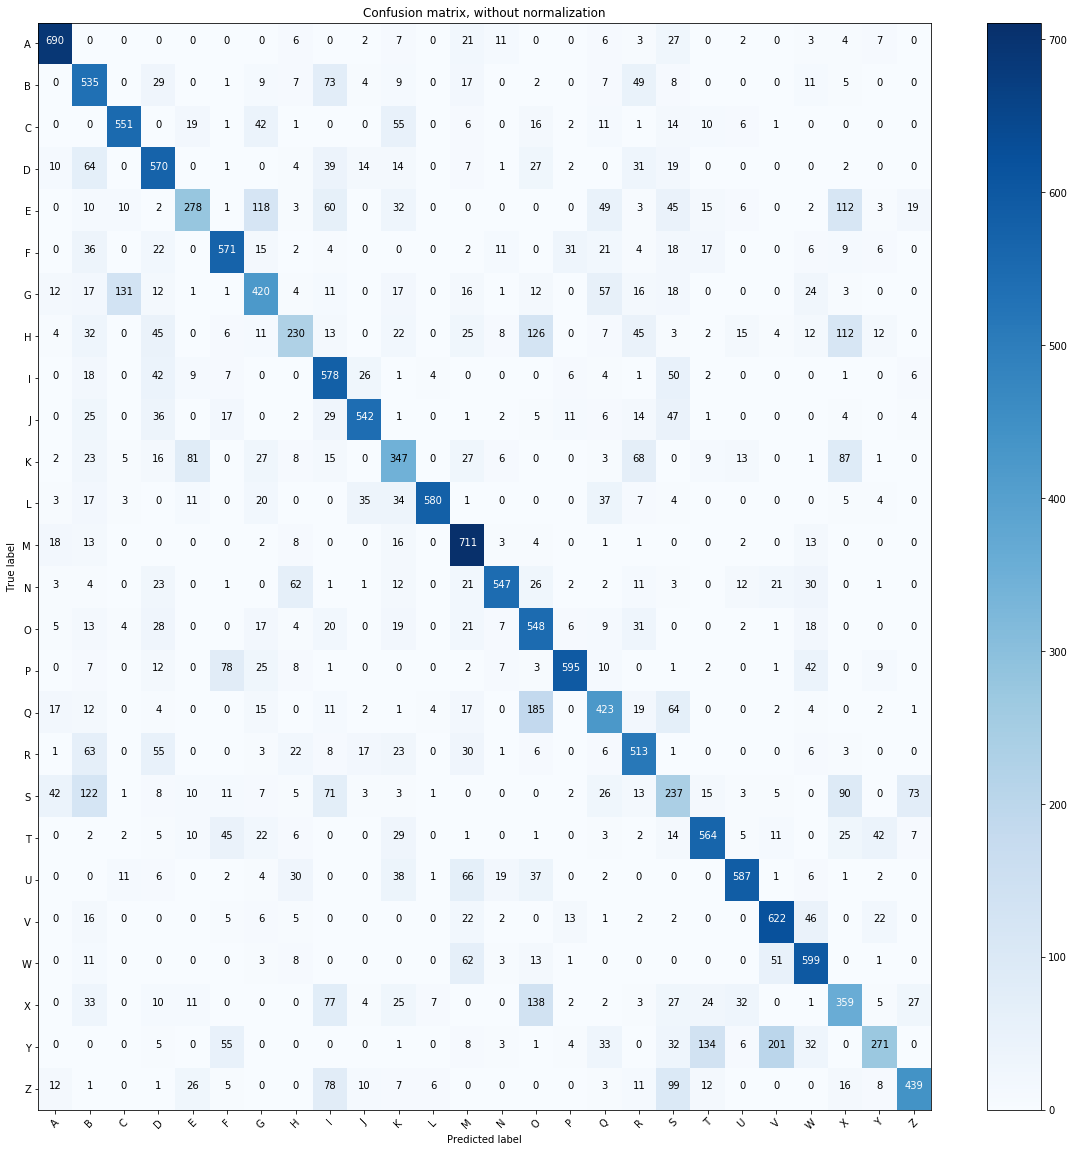

In [43]:
plt.show()

In [44]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm_letter_data, classes= ['A', 'B', 'C', 'D', 'E', 'F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'],
                      normalize = True,
                      title = 'Confusion matrix, with normalization')

Normalized confusion matrix
[[0.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.7 0.  0.  0.  0.  0.  0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.1
  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.7 0.  0.  0.  0.1 0.  0.  0.  0.1 0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.1 0.  0.7 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.4 0.  0.2 0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.1 0.
  0.1 0.  0.  0.  0.  0.1 0.  0. ]
 [0.  0.  0.  0.  0.  0.7 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.2 0.  0.  0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.
  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.1 0.  0.  0.  0.3 0.  0.  0.  0.  0.  0.  0.2 0.  0.  0.1
  0.  0.  0.  0.  0.  0.2 0.  0. ]
 [0.  0.  0.  0.1 0.  0.  0.  0.  0.8 0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.1 0.  0.  0.  0.  0.  0.  0. 

<Figure size 432x288 with 0 Axes>

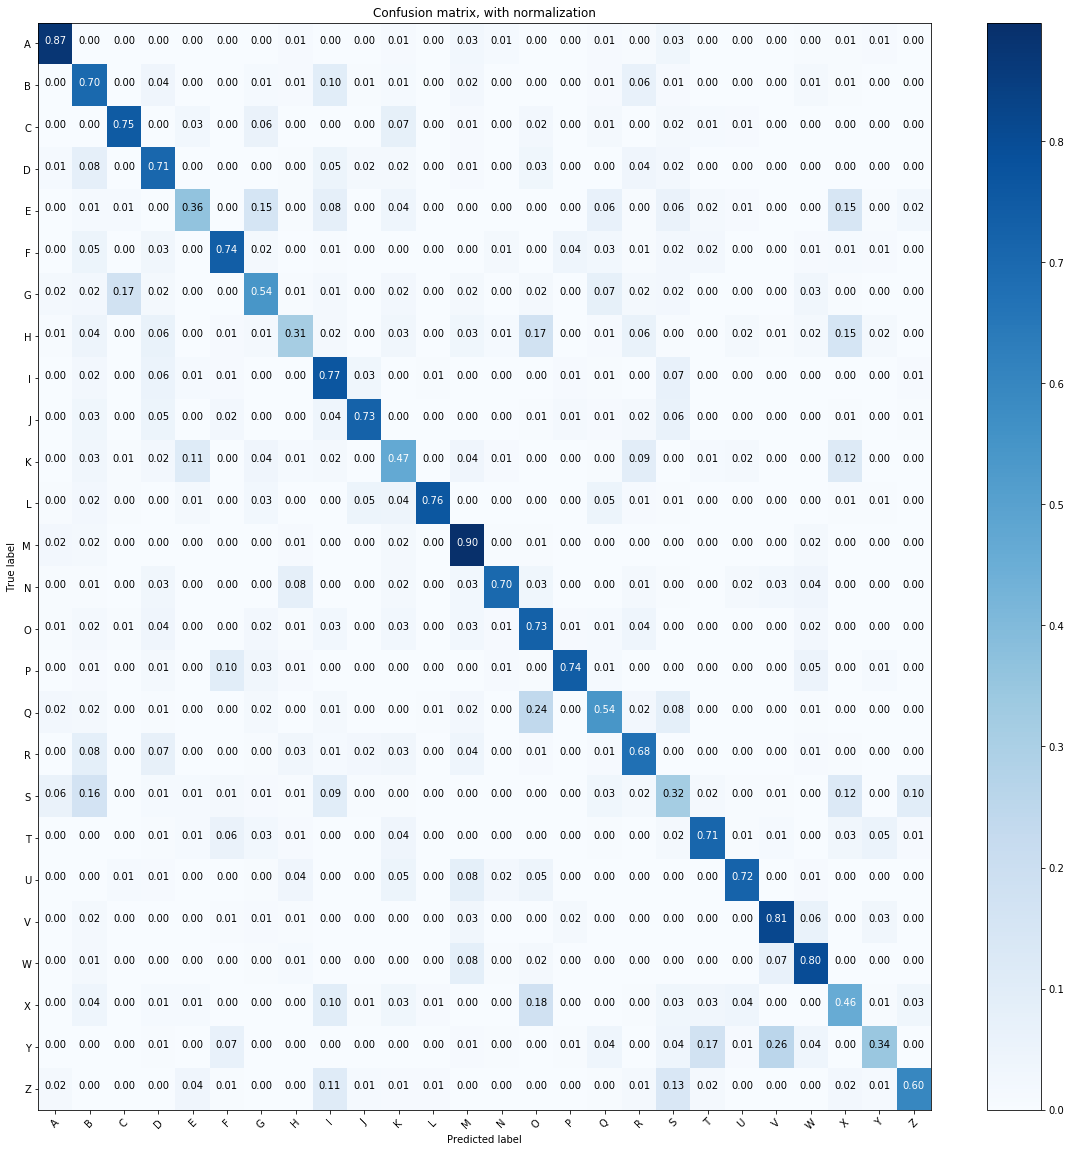

In [45]:
plt.show()

# OK, but TRAINING and TESTING on the same dataset does not give us a fair evaluation of the model

### So, to make a fair evaluation, we need to train our model on a data partition and test it on a different data partition.


## We can use three different data partition strategies:

### 1. HOLD-OUT: hold out part of the available data as a validation (or test) set. This split the data into 2 partitions (train and test).

### 2. k-FOLD CROSS VALIDATION (k-fold CV): In k-fold CV, the training set is split into k smaller sets and for each of the k “folds”:
        
* A model is trained using k-1 of the folds as training data;
* The resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).
* The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. 

### 3. LeaveOneOut Cross Validation (LOOCV): each learning set is created by taking all the samples except one, the test set being the sample left out. Thus, for n samples, we have n different training sets and n different tests set.

## 1) HOLD-OUT

In [46]:
# Using hold-out evaluation

from sklearn.model_selection import train_test_split

In [47]:
# Let's go back to the original data and separe inputs (features) and outputs (labels) into two arrays
# Define the training set

X_data  = data[:,0:num_features]
Y_data  = data[:,num_features] # last column = class labels

In [48]:
X_data

array([[ 2.,  4.,  4., ...,  8.,  5.,  6.],
       [ 4.,  7.,  5., ...,  9.,  7., 10.],
       [ 7., 10.,  8., ...,  5.,  5., 10.],
       ...,
       [ 4.,  8.,  4., ...,  9.,  3.,  7.],
       [ 4., 11.,  4., ...,  8.,  0.,  8.],
       [ 5.,  9.,  6., ...,  8.,  6.,  8.]])

In [49]:
Y_data

array([26., 16., 19., ..., 15., 12., 17.])

In [50]:
# Split the data into train and valid, holding 40% of the data into valid
# We are suffling the data to avoid ordered data by labels
# Stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
# Random_state is desirable for reproducibility.

X_train, X_valid, Y_train, Y_valid = train_test_split( X_data, Y_data,
                                                      test_size = 0.3,
                                                      random_state = 0,
                                                      shuffle = True,
                                                      stratify = Y_data )

In [51]:
X_train.shape

(14000, 16)

In [52]:
X_train

array([[ 2.,  0.,  2., ...,  8.,  0.,  8.],
       [ 2., 10.,  2., ...,  8.,  3.,  8.],
       [ 4.,  5.,  7., ...,  8.,  4.,  8.],
       ...,
       [ 3.,  4.,  4., ..., 11.,  1.,  7.],
       [ 4.,  6.,  4., ...,  9.,  0.,  8.],
       [ 4.,  7.,  4., ...,  7.,  6., 11.]])

In [53]:
Y_train.shape

(14000,)

In [54]:
X_valid.shape

(6000, 16)

In [55]:
Y_valid.shape

(6000,)

In [56]:
# Let's train our model on the X_train partition

model = MultinomialNB()
model = model.fit(X_train, Y_train)

In [57]:
# Evaluating the model on the training dataset 

Y_train_pred      = model.predict( X_train )
Y_train_pred_prob = model.predict_proba( X_train )
acc_letter_train  = accuracy_score(Y_train, Y_train_pred )
print("Correct classification rate for the training dataset = "+str(acc_letter_train*100)+"% on "+str(Y_train.shape[0])+" samples")

Correct classification rate for the training dataset = 55.221428571428575% on 14000 samples


In [58]:
# Evaluating the model on the validation dataset (more fair evaluation....) 

Y_valid_pred      = model.predict(X_valid)
Y_valid_pred_prob = model.predict_proba(X_valid)
acc_letter_valid  = accuracy_score(Y_valid, Y_valid_pred )
print("Correct classification rate for the valid dataset = "+str(acc_letter_valid*100)+"% on "+str(Y_valid.shape[0])+" samples")

Correct classification rate for the valid dataset = 54.68333333333333% on 6000 samples



## 2) k-fold CROSS VALIDATION (CV)

In [60]:
# Using k-fold cross validation (CV) evaluation

from sklearn.model_selection import cross_val_score

In [61]:
# Choose the model and fit the data

model  = MultinomialNB()

# It will train 10 models in 90% of the data and test each model in 10% of the data,
# where the training and test data change for each model 
scores = cross_val_score( model, X_data, Y_data, cv = 10 )

np.set_printoptions( precision = 5)

# It gives the performance (correct classification rate) for each model
scores

array([0.5534 , 0.5502 , 0.53632, 0.54691, 0.53473, 0.57908, 0.55918,
       0.56627, 0.55003, 0.53951])

In [62]:
print("Accuracy: %0.5f (+/- %0.5f)" % (scores.mean()*100, scores.std() * 2))

Accuracy: 55.15613 (+/- 0.02624)



## 3) Leave-One-Out Cross Validation (LOOCV)


In [63]:
# Using leave-one-out cross validation (LOOCV) evaluation
from sklearn.model_selection import LeaveOneOut


In [64]:
# Create n data splits, where n is the total number of samples
# 20,000 in our case

loo = LeaveOneOut()
loo.get_n_splits( X_data )

20000

In [65]:
# So, we will train 20,000 models, one on each data splits (19,000 samples), and test the 20,000 models on 1 sample each time. 

index = 0

acc = np.zeros( 20000 )

for train_index, test_index in loo.split( X_data ):
    X_train, X_test = X_data[train_index], X_data[test_index]
    Y_train, Y_test = Y_data[train_index], Y_data[test_index]
    
    # Train the model on X_train, Y_train 
    model = MultinomialNB()
    model = model.fit( X_train, Y_train )
    
    # Use the learned model to predict on X_test ,Y_test 
    Y_test_pred      = model.predict( X_test )
    acc_letter_valid = accuracy_score( Y_test, Y_test_pred )
    
    print("Correct classification rate for the model "+str(index+1)+": "+str(acc_letter_valid*100)+"%")
    
    acc[index] =  acc_letter_valid
    
    index += 1

Correct classification rate for the model 1: 100.0%
Correct classification rate for the model 2: 0.0%
Correct classification rate for the model 3: 0.0%
Correct classification rate for the model 4: 0.0%
Correct classification rate for the model 5: 0.0%
Correct classification rate for the model 6: 100.0%
Correct classification rate for the model 7: 100.0%
Correct classification rate for the model 8: 0.0%
Correct classification rate for the model 9: 100.0%
Correct classification rate for the model 10: 0.0%
Correct classification rate for the model 11: 100.0%
Correct classification rate for the model 12: 100.0%
Correct classification rate for the model 13: 0.0%
Correct classification rate for the model 14: 100.0%
Correct classification rate for the model 15: 0.0%
Correct classification rate for the model 16: 0.0%
Correct classification rate for the model 17: 0.0%
Correct classification rate for the model 18: 100.0%
Correct classification rate for the model 19: 0.0%
Correct classification r

Correct classification rate for the model 167: 100.0%
Correct classification rate for the model 168: 0.0%
Correct classification rate for the model 169: 100.0%
Correct classification rate for the model 170: 0.0%
Correct classification rate for the model 171: 100.0%
Correct classification rate for the model 172: 100.0%
Correct classification rate for the model 173: 0.0%
Correct classification rate for the model 174: 0.0%
Correct classification rate for the model 175: 100.0%
Correct classification rate for the model 176: 0.0%
Correct classification rate for the model 177: 0.0%
Correct classification rate for the model 178: 0.0%
Correct classification rate for the model 179: 0.0%
Correct classification rate for the model 180: 100.0%
Correct classification rate for the model 181: 0.0%
Correct classification rate for the model 182: 0.0%
Correct classification rate for the model 183: 0.0%
Correct classification rate for the model 184: 100.0%
Correct classification rate for the model 185: 100

Correct classification rate for the model 333: 100.0%
Correct classification rate for the model 334: 100.0%
Correct classification rate for the model 335: 100.0%
Correct classification rate for the model 336: 100.0%
Correct classification rate for the model 337: 100.0%
Correct classification rate for the model 338: 100.0%
Correct classification rate for the model 339: 100.0%
Correct classification rate for the model 340: 0.0%
Correct classification rate for the model 341: 0.0%
Correct classification rate for the model 342: 0.0%
Correct classification rate for the model 343: 0.0%
Correct classification rate for the model 344: 100.0%
Correct classification rate for the model 345: 0.0%
Correct classification rate for the model 346: 0.0%
Correct classification rate for the model 347: 0.0%
Correct classification rate for the model 348: 100.0%
Correct classification rate for the model 349: 100.0%
Correct classification rate for the model 350: 0.0%
Correct classification rate for the model 35

Correct classification rate for the model 498: 0.0%
Correct classification rate for the model 499: 0.0%
Correct classification rate for the model 500: 100.0%
Correct classification rate for the model 501: 0.0%
Correct classification rate for the model 502: 100.0%
Correct classification rate for the model 503: 0.0%
Correct classification rate for the model 504: 100.0%
Correct classification rate for the model 505: 100.0%
Correct classification rate for the model 506: 100.0%
Correct classification rate for the model 507: 100.0%
Correct classification rate for the model 508: 0.0%
Correct classification rate for the model 509: 100.0%
Correct classification rate for the model 510: 100.0%
Correct classification rate for the model 511: 0.0%
Correct classification rate for the model 512: 0.0%
Correct classification rate for the model 513: 0.0%
Correct classification rate for the model 514: 0.0%
Correct classification rate for the model 515: 0.0%
Correct classification rate for the model 516: 0

Correct classification rate for the model 664: 0.0%
Correct classification rate for the model 665: 100.0%
Correct classification rate for the model 666: 0.0%
Correct classification rate for the model 667: 100.0%
Correct classification rate for the model 668: 0.0%
Correct classification rate for the model 669: 0.0%
Correct classification rate for the model 670: 100.0%
Correct classification rate for the model 671: 100.0%
Correct classification rate for the model 672: 0.0%
Correct classification rate for the model 673: 100.0%
Correct classification rate for the model 674: 100.0%
Correct classification rate for the model 675: 0.0%
Correct classification rate for the model 676: 0.0%
Correct classification rate for the model 677: 100.0%
Correct classification rate for the model 678: 0.0%
Correct classification rate for the model 679: 100.0%
Correct classification rate for the model 680: 0.0%
Correct classification rate for the model 681: 100.0%
Correct classification rate for the model 682:

Correct classification rate for the model 831: 0.0%
Correct classification rate for the model 832: 100.0%
Correct classification rate for the model 833: 0.0%
Correct classification rate for the model 834: 100.0%
Correct classification rate for the model 835: 0.0%
Correct classification rate for the model 836: 100.0%
Correct classification rate for the model 837: 0.0%
Correct classification rate for the model 838: 100.0%
Correct classification rate for the model 839: 100.0%
Correct classification rate for the model 840: 0.0%
Correct classification rate for the model 841: 0.0%
Correct classification rate for the model 842: 0.0%
Correct classification rate for the model 843: 100.0%
Correct classification rate for the model 844: 100.0%
Correct classification rate for the model 845: 0.0%
Correct classification rate for the model 846: 0.0%
Correct classification rate for the model 847: 0.0%
Correct classification rate for the model 848: 0.0%
Correct classification rate for the model 849: 0.0

Correct classification rate for the model 999: 100.0%
Correct classification rate for the model 1000: 0.0%
Correct classification rate for the model 1001: 100.0%
Correct classification rate for the model 1002: 0.0%
Correct classification rate for the model 1003: 0.0%
Correct classification rate for the model 1004: 100.0%
Correct classification rate for the model 1005: 100.0%
Correct classification rate for the model 1006: 100.0%
Correct classification rate for the model 1007: 0.0%
Correct classification rate for the model 1008: 0.0%
Correct classification rate for the model 1009: 100.0%
Correct classification rate for the model 1010: 0.0%
Correct classification rate for the model 1011: 0.0%
Correct classification rate for the model 1012: 0.0%
Correct classification rate for the model 1013: 100.0%
Correct classification rate for the model 1014: 100.0%
Correct classification rate for the model 1015: 100.0%
Correct classification rate for the model 1016: 100.0%
Correct classification rate

Correct classification rate for the model 1169: 100.0%
Correct classification rate for the model 1170: 100.0%
Correct classification rate for the model 1171: 100.0%
Correct classification rate for the model 1172: 0.0%
Correct classification rate for the model 1173: 0.0%
Correct classification rate for the model 1174: 0.0%
Correct classification rate for the model 1175: 0.0%
Correct classification rate for the model 1176: 0.0%
Correct classification rate for the model 1177: 0.0%
Correct classification rate for the model 1178: 0.0%
Correct classification rate for the model 1179: 100.0%
Correct classification rate for the model 1180: 100.0%
Correct classification rate for the model 1181: 100.0%
Correct classification rate for the model 1182: 0.0%
Correct classification rate for the model 1183: 100.0%
Correct classification rate for the model 1184: 100.0%
Correct classification rate for the model 1185: 100.0%
Correct classification rate for the model 1186: 0.0%
Correct classification rate 

Correct classification rate for the model 1338: 100.0%
Correct classification rate for the model 1339: 0.0%
Correct classification rate for the model 1340: 100.0%
Correct classification rate for the model 1341: 0.0%
Correct classification rate for the model 1342: 100.0%
Correct classification rate for the model 1343: 0.0%
Correct classification rate for the model 1344: 100.0%
Correct classification rate for the model 1345: 100.0%
Correct classification rate for the model 1346: 100.0%
Correct classification rate for the model 1347: 100.0%
Correct classification rate for the model 1348: 0.0%
Correct classification rate for the model 1349: 0.0%
Correct classification rate for the model 1350: 0.0%
Correct classification rate for the model 1351: 100.0%
Correct classification rate for the model 1352: 100.0%
Correct classification rate for the model 1353: 0.0%
Correct classification rate for the model 1354: 0.0%
Correct classification rate for the model 1355: 100.0%
Correct classification rat

Correct classification rate for the model 1506: 0.0%
Correct classification rate for the model 1507: 100.0%
Correct classification rate for the model 1508: 0.0%
Correct classification rate for the model 1509: 0.0%
Correct classification rate for the model 1510: 100.0%
Correct classification rate for the model 1511: 0.0%
Correct classification rate for the model 1512: 100.0%
Correct classification rate for the model 1513: 0.0%
Correct classification rate for the model 1514: 100.0%
Correct classification rate for the model 1515: 0.0%
Correct classification rate for the model 1516: 100.0%
Correct classification rate for the model 1517: 0.0%
Correct classification rate for the model 1518: 0.0%
Correct classification rate for the model 1519: 100.0%
Correct classification rate for the model 1520: 100.0%
Correct classification rate for the model 1521: 100.0%
Correct classification rate for the model 1522: 0.0%
Correct classification rate for the model 1523: 100.0%
Correct classification rate 

Correct classification rate for the model 1675: 0.0%
Correct classification rate for the model 1676: 0.0%
Correct classification rate for the model 1677: 100.0%
Correct classification rate for the model 1678: 100.0%
Correct classification rate for the model 1679: 100.0%
Correct classification rate for the model 1680: 100.0%
Correct classification rate for the model 1681: 100.0%
Correct classification rate for the model 1682: 100.0%
Correct classification rate for the model 1683: 100.0%
Correct classification rate for the model 1684: 0.0%
Correct classification rate for the model 1685: 100.0%
Correct classification rate for the model 1686: 100.0%
Correct classification rate for the model 1687: 100.0%
Correct classification rate for the model 1688: 0.0%
Correct classification rate for the model 1689: 100.0%
Correct classification rate for the model 1690: 100.0%
Correct classification rate for the model 1691: 100.0%
Correct classification rate for the model 1692: 100.0%
Correct classifica

Correct classification rate for the model 1839: 0.0%
Correct classification rate for the model 1840: 0.0%
Correct classification rate for the model 1841: 0.0%
Correct classification rate for the model 1842: 100.0%
Correct classification rate for the model 1843: 100.0%
Correct classification rate for the model 1844: 0.0%
Correct classification rate for the model 1845: 0.0%
Correct classification rate for the model 1846: 0.0%
Correct classification rate for the model 1847: 0.0%
Correct classification rate for the model 1848: 100.0%
Correct classification rate for the model 1849: 100.0%
Correct classification rate for the model 1850: 0.0%
Correct classification rate for the model 1851: 100.0%
Correct classification rate for the model 1852: 100.0%
Correct classification rate for the model 1853: 0.0%
Correct classification rate for the model 1854: 0.0%
Correct classification rate for the model 1855: 100.0%
Correct classification rate for the model 1856: 100.0%
Correct classification rate fo

Correct classification rate for the model 2002: 0.0%
Correct classification rate for the model 2003: 0.0%
Correct classification rate for the model 2004: 100.0%
Correct classification rate for the model 2005: 100.0%
Correct classification rate for the model 2006: 0.0%
Correct classification rate for the model 2007: 0.0%
Correct classification rate for the model 2008: 100.0%
Correct classification rate for the model 2009: 100.0%
Correct classification rate for the model 2010: 100.0%
Correct classification rate for the model 2011: 0.0%
Correct classification rate for the model 2012: 100.0%
Correct classification rate for the model 2013: 0.0%
Correct classification rate for the model 2014: 0.0%
Correct classification rate for the model 2015: 100.0%
Correct classification rate for the model 2016: 100.0%
Correct classification rate for the model 2017: 100.0%
Correct classification rate for the model 2018: 0.0%
Correct classification rate for the model 2019: 100.0%
Correct classification rat

Correct classification rate for the model 2160: 100.0%
Correct classification rate for the model 2161: 0.0%
Correct classification rate for the model 2162: 0.0%
Correct classification rate for the model 2163: 0.0%
Correct classification rate for the model 2164: 100.0%
Correct classification rate for the model 2165: 100.0%
Correct classification rate for the model 2166: 100.0%
Correct classification rate for the model 2167: 0.0%
Correct classification rate for the model 2168: 0.0%
Correct classification rate for the model 2169: 100.0%
Correct classification rate for the model 2170: 0.0%
Correct classification rate for the model 2171: 100.0%
Correct classification rate for the model 2172: 100.0%
Correct classification rate for the model 2173: 0.0%
Correct classification rate for the model 2174: 0.0%
Correct classification rate for the model 2175: 100.0%
Correct classification rate for the model 2176: 100.0%
Correct classification rate for the model 2177: 100.0%
Correct classification rat

Correct classification rate for the model 2315: 100.0%
Correct classification rate for the model 2316: 100.0%
Correct classification rate for the model 2317: 0.0%
Correct classification rate for the model 2318: 100.0%
Correct classification rate for the model 2319: 0.0%
Correct classification rate for the model 2320: 100.0%
Correct classification rate for the model 2321: 100.0%
Correct classification rate for the model 2322: 0.0%
Correct classification rate for the model 2323: 0.0%
Correct classification rate for the model 2324: 100.0%
Correct classification rate for the model 2325: 100.0%
Correct classification rate for the model 2326: 0.0%
Correct classification rate for the model 2327: 100.0%
Correct classification rate for the model 2328: 0.0%
Correct classification rate for the model 2329: 0.0%
Correct classification rate for the model 2330: 100.0%
Correct classification rate for the model 2331: 100.0%
Correct classification rate for the model 2332: 0.0%
Correct classification rat

Correct classification rate for the model 2468: 0.0%
Correct classification rate for the model 2469: 0.0%
Correct classification rate for the model 2470: 100.0%
Correct classification rate for the model 2471: 0.0%
Correct classification rate for the model 2472: 100.0%
Correct classification rate for the model 2473: 0.0%
Correct classification rate for the model 2474: 0.0%
Correct classification rate for the model 2475: 100.0%
Correct classification rate for the model 2476: 100.0%
Correct classification rate for the model 2477: 0.0%
Correct classification rate for the model 2478: 100.0%
Correct classification rate for the model 2479: 0.0%
Correct classification rate for the model 2480: 100.0%
Correct classification rate for the model 2481: 100.0%
Correct classification rate for the model 2482: 0.0%
Correct classification rate for the model 2483: 0.0%
Correct classification rate for the model 2484: 0.0%
Correct classification rate for the model 2485: 100.0%
Correct classification rate fo

Correct classification rate for the model 2621: 0.0%
Correct classification rate for the model 2622: 100.0%
Correct classification rate for the model 2623: 100.0%
Correct classification rate for the model 2624: 0.0%
Correct classification rate for the model 2625: 100.0%
Correct classification rate for the model 2626: 100.0%
Correct classification rate for the model 2627: 100.0%
Correct classification rate for the model 2628: 100.0%
Correct classification rate for the model 2629: 100.0%
Correct classification rate for the model 2630: 0.0%
Correct classification rate for the model 2631: 0.0%
Correct classification rate for the model 2632: 100.0%
Correct classification rate for the model 2633: 0.0%
Correct classification rate for the model 2634: 0.0%
Correct classification rate for the model 2635: 0.0%
Correct classification rate for the model 2636: 100.0%
Correct classification rate for the model 2637: 100.0%
Correct classification rate for the model 2638: 100.0%
Correct classification r

Correct classification rate for the model 2775: 100.0%
Correct classification rate for the model 2776: 100.0%
Correct classification rate for the model 2777: 0.0%
Correct classification rate for the model 2778: 100.0%
Correct classification rate for the model 2779: 0.0%
Correct classification rate for the model 2780: 0.0%
Correct classification rate for the model 2781: 0.0%
Correct classification rate for the model 2782: 100.0%
Correct classification rate for the model 2783: 100.0%
Correct classification rate for the model 2784: 100.0%
Correct classification rate for the model 2785: 0.0%
Correct classification rate for the model 2786: 0.0%
Correct classification rate for the model 2787: 100.0%
Correct classification rate for the model 2788: 100.0%
Correct classification rate for the model 2789: 100.0%
Correct classification rate for the model 2790: 0.0%
Correct classification rate for the model 2791: 0.0%
Correct classification rate for the model 2792: 100.0%
Correct classification rat

Correct classification rate for the model 2948: 0.0%
Correct classification rate for the model 2949: 100.0%
Correct classification rate for the model 2950: 100.0%
Correct classification rate for the model 2951: 100.0%
Correct classification rate for the model 2952: 100.0%
Correct classification rate for the model 2953: 0.0%
Correct classification rate for the model 2954: 100.0%
Correct classification rate for the model 2955: 0.0%
Correct classification rate for the model 2956: 0.0%
Correct classification rate for the model 2957: 0.0%
Correct classification rate for the model 2958: 0.0%
Correct classification rate for the model 2959: 0.0%
Correct classification rate for the model 2960: 100.0%
Correct classification rate for the model 2961: 0.0%
Correct classification rate for the model 2962: 0.0%
Correct classification rate for the model 2963: 100.0%
Correct classification rate for the model 2964: 0.0%
Correct classification rate for the model 2965: 0.0%
Correct classification rate for 

Correct classification rate for the model 3104: 0.0%
Correct classification rate for the model 3105: 100.0%
Correct classification rate for the model 3106: 0.0%
Correct classification rate for the model 3107: 0.0%
Correct classification rate for the model 3108: 0.0%
Correct classification rate for the model 3109: 0.0%
Correct classification rate for the model 3110: 0.0%
Correct classification rate for the model 3111: 0.0%
Correct classification rate for the model 3112: 100.0%
Correct classification rate for the model 3113: 100.0%
Correct classification rate for the model 3114: 100.0%
Correct classification rate for the model 3115: 100.0%
Correct classification rate for the model 3116: 100.0%
Correct classification rate for the model 3117: 100.0%
Correct classification rate for the model 3118: 0.0%
Correct classification rate for the model 3119: 0.0%
Correct classification rate for the model 3120: 0.0%
Correct classification rate for the model 3121: 0.0%
Correct classification rate for 

Correct classification rate for the model 3277: 0.0%
Correct classification rate for the model 3278: 100.0%
Correct classification rate for the model 3279: 0.0%
Correct classification rate for the model 3280: 100.0%
Correct classification rate for the model 3281: 100.0%
Correct classification rate for the model 3282: 0.0%
Correct classification rate for the model 3283: 100.0%
Correct classification rate for the model 3284: 0.0%
Correct classification rate for the model 3285: 100.0%
Correct classification rate for the model 3286: 0.0%
Correct classification rate for the model 3287: 100.0%
Correct classification rate for the model 3288: 100.0%
Correct classification rate for the model 3289: 100.0%
Correct classification rate for the model 3290: 0.0%
Correct classification rate for the model 3291: 100.0%
Correct classification rate for the model 3292: 100.0%
Correct classification rate for the model 3293: 0.0%
Correct classification rate for the model 3294: 100.0%
Correct classification r

Correct classification rate for the model 3430: 100.0%
Correct classification rate for the model 3431: 100.0%
Correct classification rate for the model 3432: 0.0%
Correct classification rate for the model 3433: 0.0%
Correct classification rate for the model 3434: 100.0%
Correct classification rate for the model 3435: 100.0%
Correct classification rate for the model 3436: 100.0%
Correct classification rate for the model 3437: 0.0%
Correct classification rate for the model 3438: 0.0%
Correct classification rate for the model 3439: 100.0%
Correct classification rate for the model 3440: 100.0%
Correct classification rate for the model 3441: 0.0%
Correct classification rate for the model 3442: 100.0%
Correct classification rate for the model 3443: 0.0%
Correct classification rate for the model 3444: 100.0%
Correct classification rate for the model 3445: 0.0%
Correct classification rate for the model 3446: 100.0%
Correct classification rate for the model 3447: 100.0%
Correct classification r

Correct classification rate for the model 3583: 100.0%
Correct classification rate for the model 3584: 100.0%
Correct classification rate for the model 3585: 100.0%
Correct classification rate for the model 3586: 100.0%
Correct classification rate for the model 3587: 0.0%
Correct classification rate for the model 3588: 0.0%
Correct classification rate for the model 3589: 100.0%
Correct classification rate for the model 3590: 0.0%
Correct classification rate for the model 3591: 0.0%
Correct classification rate for the model 3592: 100.0%
Correct classification rate for the model 3593: 0.0%
Correct classification rate for the model 3594: 100.0%
Correct classification rate for the model 3595: 0.0%
Correct classification rate for the model 3596: 100.0%
Correct classification rate for the model 3597: 100.0%
Correct classification rate for the model 3598: 100.0%
Correct classification rate for the model 3599: 100.0%
Correct classification rate for the model 3600: 0.0%
Correct classification r

Correct classification rate for the model 3737: 100.0%
Correct classification rate for the model 3738: 100.0%
Correct classification rate for the model 3739: 0.0%
Correct classification rate for the model 3740: 100.0%
Correct classification rate for the model 3741: 100.0%
Correct classification rate for the model 3742: 100.0%
Correct classification rate for the model 3743: 0.0%
Correct classification rate for the model 3744: 100.0%
Correct classification rate for the model 3745: 100.0%
Correct classification rate for the model 3746: 100.0%
Correct classification rate for the model 3747: 100.0%
Correct classification rate for the model 3748: 100.0%
Correct classification rate for the model 3749: 100.0%
Correct classification rate for the model 3750: 100.0%
Correct classification rate for the model 3751: 100.0%
Correct classification rate for the model 3752: 100.0%
Correct classification rate for the model 3753: 100.0%
Correct classification rate for the model 3754: 0.0%
Correct classifi

Correct classification rate for the model 3891: 0.0%
Correct classification rate for the model 3892: 100.0%
Correct classification rate for the model 3893: 100.0%
Correct classification rate for the model 3894: 100.0%
Correct classification rate for the model 3895: 100.0%
Correct classification rate for the model 3896: 0.0%
Correct classification rate for the model 3897: 0.0%
Correct classification rate for the model 3898: 100.0%
Correct classification rate for the model 3899: 0.0%
Correct classification rate for the model 3900: 0.0%
Correct classification rate for the model 3901: 100.0%
Correct classification rate for the model 3902: 100.0%
Correct classification rate for the model 3903: 0.0%
Correct classification rate for the model 3904: 100.0%
Correct classification rate for the model 3905: 0.0%
Correct classification rate for the model 3906: 100.0%
Correct classification rate for the model 3907: 100.0%
Correct classification rate for the model 3908: 100.0%
Correct classification r

Correct classification rate for the model 4047: 100.0%
Correct classification rate for the model 4048: 0.0%
Correct classification rate for the model 4049: 0.0%
Correct classification rate for the model 4050: 100.0%
Correct classification rate for the model 4051: 100.0%
Correct classification rate for the model 4052: 100.0%
Correct classification rate for the model 4053: 0.0%
Correct classification rate for the model 4054: 100.0%
Correct classification rate for the model 4055: 100.0%
Correct classification rate for the model 4056: 0.0%
Correct classification rate for the model 4057: 100.0%
Correct classification rate for the model 4058: 0.0%
Correct classification rate for the model 4059: 0.0%
Correct classification rate for the model 4060: 100.0%
Correct classification rate for the model 4061: 100.0%
Correct classification rate for the model 4062: 0.0%
Correct classification rate for the model 4063: 0.0%
Correct classification rate for the model 4064: 0.0%
Correct classification rate 

Correct classification rate for the model 4201: 0.0%
Correct classification rate for the model 4202: 100.0%
Correct classification rate for the model 4203: 0.0%
Correct classification rate for the model 4204: 100.0%
Correct classification rate for the model 4205: 0.0%
Correct classification rate for the model 4206: 100.0%
Correct classification rate for the model 4207: 0.0%
Correct classification rate for the model 4208: 100.0%
Correct classification rate for the model 4209: 0.0%
Correct classification rate for the model 4210: 0.0%
Correct classification rate for the model 4211: 100.0%
Correct classification rate for the model 4212: 0.0%
Correct classification rate for the model 4213: 0.0%
Correct classification rate for the model 4214: 0.0%
Correct classification rate for the model 4215: 100.0%
Correct classification rate for the model 4216: 100.0%
Correct classification rate for the model 4217: 100.0%
Correct classification rate for the model 4218: 100.0%
Correct classification rate 

Correct classification rate for the model 4356: 100.0%
Correct classification rate for the model 4357: 0.0%
Correct classification rate for the model 4358: 100.0%
Correct classification rate for the model 4359: 0.0%
Correct classification rate for the model 4360: 100.0%
Correct classification rate for the model 4361: 0.0%
Correct classification rate for the model 4362: 100.0%
Correct classification rate for the model 4363: 100.0%
Correct classification rate for the model 4364: 0.0%
Correct classification rate for the model 4365: 0.0%
Correct classification rate for the model 4366: 0.0%
Correct classification rate for the model 4367: 0.0%
Correct classification rate for the model 4368: 100.0%
Correct classification rate for the model 4369: 100.0%
Correct classification rate for the model 4370: 100.0%
Correct classification rate for the model 4371: 100.0%
Correct classification rate for the model 4372: 0.0%
Correct classification rate for the model 4373: 0.0%
Correct classification rate 

Correct classification rate for the model 4509: 100.0%
Correct classification rate for the model 4510: 0.0%
Correct classification rate for the model 4511: 100.0%
Correct classification rate for the model 4512: 100.0%
Correct classification rate for the model 4513: 0.0%
Correct classification rate for the model 4514: 0.0%
Correct classification rate for the model 4515: 0.0%
Correct classification rate for the model 4516: 100.0%
Correct classification rate for the model 4517: 100.0%
Correct classification rate for the model 4518: 100.0%
Correct classification rate for the model 4519: 100.0%
Correct classification rate for the model 4520: 100.0%
Correct classification rate for the model 4521: 100.0%
Correct classification rate for the model 4522: 0.0%
Correct classification rate for the model 4523: 0.0%
Correct classification rate for the model 4524: 100.0%
Correct classification rate for the model 4525: 100.0%
Correct classification rate for the model 4526: 100.0%
Correct classification

Correct classification rate for the model 4662: 100.0%
Correct classification rate for the model 4663: 0.0%
Correct classification rate for the model 4664: 0.0%
Correct classification rate for the model 4665: 100.0%
Correct classification rate for the model 4666: 0.0%
Correct classification rate for the model 4667: 0.0%
Correct classification rate for the model 4668: 0.0%
Correct classification rate for the model 4669: 0.0%
Correct classification rate for the model 4670: 100.0%
Correct classification rate for the model 4671: 0.0%
Correct classification rate for the model 4672: 100.0%
Correct classification rate for the model 4673: 0.0%
Correct classification rate for the model 4674: 0.0%
Correct classification rate for the model 4675: 0.0%
Correct classification rate for the model 4676: 0.0%
Correct classification rate for the model 4677: 0.0%
Correct classification rate for the model 4678: 100.0%
Correct classification rate for the model 4679: 100.0%
Correct classification rate for th

Correct classification rate for the model 4816: 100.0%
Correct classification rate for the model 4817: 0.0%
Correct classification rate for the model 4818: 100.0%
Correct classification rate for the model 4819: 100.0%
Correct classification rate for the model 4820: 100.0%
Correct classification rate for the model 4821: 0.0%
Correct classification rate for the model 4822: 0.0%
Correct classification rate for the model 4823: 0.0%
Correct classification rate for the model 4824: 0.0%
Correct classification rate for the model 4825: 100.0%
Correct classification rate for the model 4826: 100.0%
Correct classification rate for the model 4827: 100.0%
Correct classification rate for the model 4828: 0.0%
Correct classification rate for the model 4829: 0.0%
Correct classification rate for the model 4830: 100.0%
Correct classification rate for the model 4831: 0.0%
Correct classification rate for the model 4832: 0.0%
Correct classification rate for the model 4833: 100.0%
Correct classification rate 

Correct classification rate for the model 4970: 0.0%
Correct classification rate for the model 4971: 100.0%
Correct classification rate for the model 4972: 0.0%
Correct classification rate for the model 4973: 0.0%
Correct classification rate for the model 4974: 100.0%
Correct classification rate for the model 4975: 100.0%
Correct classification rate for the model 4976: 0.0%
Correct classification rate for the model 4977: 0.0%
Correct classification rate for the model 4978: 0.0%
Correct classification rate for the model 4979: 0.0%
Correct classification rate for the model 4980: 100.0%
Correct classification rate for the model 4981: 0.0%
Correct classification rate for the model 4982: 0.0%
Correct classification rate for the model 4983: 0.0%
Correct classification rate for the model 4984: 100.0%
Correct classification rate for the model 4985: 0.0%
Correct classification rate for the model 4986: 0.0%
Correct classification rate for the model 4987: 0.0%
Correct classification rate for the 

Correct classification rate for the model 5122: 100.0%
Correct classification rate for the model 5123: 100.0%
Correct classification rate for the model 5124: 100.0%
Correct classification rate for the model 5125: 100.0%
Correct classification rate for the model 5126: 0.0%
Correct classification rate for the model 5127: 0.0%
Correct classification rate for the model 5128: 0.0%
Correct classification rate for the model 5129: 0.0%
Correct classification rate for the model 5130: 0.0%
Correct classification rate for the model 5131: 100.0%
Correct classification rate for the model 5132: 100.0%
Correct classification rate for the model 5133: 100.0%
Correct classification rate for the model 5134: 0.0%
Correct classification rate for the model 5135: 0.0%
Correct classification rate for the model 5136: 0.0%
Correct classification rate for the model 5137: 100.0%
Correct classification rate for the model 5138: 100.0%
Correct classification rate for the model 5139: 0.0%
Correct classification rate 

Correct classification rate for the model 5291: 100.0%
Correct classification rate for the model 5292: 100.0%
Correct classification rate for the model 5293: 100.0%
Correct classification rate for the model 5294: 100.0%
Correct classification rate for the model 5295: 0.0%
Correct classification rate for the model 5296: 0.0%
Correct classification rate for the model 5297: 100.0%
Correct classification rate for the model 5298: 100.0%
Correct classification rate for the model 5299: 100.0%
Correct classification rate for the model 5300: 0.0%
Correct classification rate for the model 5301: 0.0%
Correct classification rate for the model 5302: 100.0%
Correct classification rate for the model 5303: 100.0%
Correct classification rate for the model 5304: 0.0%
Correct classification rate for the model 5305: 0.0%
Correct classification rate for the model 5306: 100.0%
Correct classification rate for the model 5307: 100.0%
Correct classification rate for the model 5308: 0.0%
Correct classification r

Correct classification rate for the model 5459: 100.0%
Correct classification rate for the model 5460: 0.0%
Correct classification rate for the model 5461: 100.0%
Correct classification rate for the model 5462: 100.0%
Correct classification rate for the model 5463: 0.0%
Correct classification rate for the model 5464: 0.0%
Correct classification rate for the model 5465: 0.0%
Correct classification rate for the model 5466: 0.0%
Correct classification rate for the model 5467: 100.0%
Correct classification rate for the model 5468: 100.0%
Correct classification rate for the model 5469: 100.0%
Correct classification rate for the model 5470: 0.0%
Correct classification rate for the model 5471: 0.0%
Correct classification rate for the model 5472: 100.0%
Correct classification rate for the model 5473: 100.0%
Correct classification rate for the model 5474: 0.0%
Correct classification rate for the model 5475: 0.0%
Correct classification rate for the model 5476: 100.0%
Correct classification rate 

Correct classification rate for the model 5627: 0.0%
Correct classification rate for the model 5628: 0.0%
Correct classification rate for the model 5629: 100.0%
Correct classification rate for the model 5630: 0.0%
Correct classification rate for the model 5631: 100.0%
Correct classification rate for the model 5632: 100.0%
Correct classification rate for the model 5633: 100.0%
Correct classification rate for the model 5634: 0.0%
Correct classification rate for the model 5635: 0.0%
Correct classification rate for the model 5636: 0.0%
Correct classification rate for the model 5637: 100.0%
Correct classification rate for the model 5638: 0.0%
Correct classification rate for the model 5639: 0.0%
Correct classification rate for the model 5640: 0.0%
Correct classification rate for the model 5641: 100.0%
Correct classification rate for the model 5642: 100.0%
Correct classification rate for the model 5643: 0.0%
Correct classification rate for the model 5644: 100.0%
Correct classification rate fo

Correct classification rate for the model 5793: 0.0%
Correct classification rate for the model 5794: 100.0%
Correct classification rate for the model 5795: 100.0%
Correct classification rate for the model 5796: 100.0%
Correct classification rate for the model 5797: 100.0%
Correct classification rate for the model 5798: 0.0%
Correct classification rate for the model 5799: 0.0%
Correct classification rate for the model 5800: 0.0%
Correct classification rate for the model 5801: 100.0%
Correct classification rate for the model 5802: 0.0%
Correct classification rate for the model 5803: 0.0%
Correct classification rate for the model 5804: 100.0%
Correct classification rate for the model 5805: 0.0%
Correct classification rate for the model 5806: 100.0%
Correct classification rate for the model 5807: 0.0%
Correct classification rate for the model 5808: 0.0%
Correct classification rate for the model 5809: 100.0%
Correct classification rate for the model 5810: 100.0%
Correct classification rate 

Correct classification rate for the model 5958: 0.0%
Correct classification rate for the model 5959: 0.0%
Correct classification rate for the model 5960: 0.0%
Correct classification rate for the model 5961: 0.0%
Correct classification rate for the model 5962: 100.0%
Correct classification rate for the model 5963: 100.0%
Correct classification rate for the model 5964: 0.0%
Correct classification rate for the model 5965: 100.0%
Correct classification rate for the model 5966: 100.0%
Correct classification rate for the model 5967: 100.0%
Correct classification rate for the model 5968: 100.0%
Correct classification rate for the model 5969: 0.0%
Correct classification rate for the model 5970: 0.0%
Correct classification rate for the model 5971: 0.0%
Correct classification rate for the model 5972: 100.0%
Correct classification rate for the model 5973: 0.0%
Correct classification rate for the model 5974: 100.0%
Correct classification rate for the model 5975: 100.0%
Correct classification rate 

Correct classification rate for the model 6121: 0.0%
Correct classification rate for the model 6122: 100.0%
Correct classification rate for the model 6123: 0.0%
Correct classification rate for the model 6124: 0.0%
Correct classification rate for the model 6125: 0.0%
Correct classification rate for the model 6126: 0.0%
Correct classification rate for the model 6127: 0.0%
Correct classification rate for the model 6128: 100.0%
Correct classification rate for the model 6129: 0.0%
Correct classification rate for the model 6130: 100.0%
Correct classification rate for the model 6131: 100.0%
Correct classification rate for the model 6132: 0.0%
Correct classification rate for the model 6133: 100.0%
Correct classification rate for the model 6134: 0.0%
Correct classification rate for the model 6135: 100.0%
Correct classification rate for the model 6136: 100.0%
Correct classification rate for the model 6137: 100.0%
Correct classification rate for the model 6138: 0.0%
Correct classification rate fo

Correct classification rate for the model 6290: 100.0%
Correct classification rate for the model 6291: 0.0%
Correct classification rate for the model 6292: 100.0%
Correct classification rate for the model 6293: 100.0%
Correct classification rate for the model 6294: 0.0%
Correct classification rate for the model 6295: 100.0%
Correct classification rate for the model 6296: 100.0%
Correct classification rate for the model 6297: 0.0%
Correct classification rate for the model 6298: 100.0%
Correct classification rate for the model 6299: 0.0%
Correct classification rate for the model 6300: 100.0%
Correct classification rate for the model 6301: 100.0%
Correct classification rate for the model 6302: 100.0%
Correct classification rate for the model 6303: 0.0%
Correct classification rate for the model 6304: 100.0%
Correct classification rate for the model 6305: 0.0%
Correct classification rate for the model 6306: 100.0%
Correct classification rate for the model 6307: 100.0%
Correct classification

Correct classification rate for the model 6454: 0.0%
Correct classification rate for the model 6455: 100.0%
Correct classification rate for the model 6456: 0.0%
Correct classification rate for the model 6457: 0.0%
Correct classification rate for the model 6458: 100.0%
Correct classification rate for the model 6459: 100.0%
Correct classification rate for the model 6460: 0.0%
Correct classification rate for the model 6461: 100.0%
Correct classification rate for the model 6462: 0.0%
Correct classification rate for the model 6463: 100.0%
Correct classification rate for the model 6464: 0.0%
Correct classification rate for the model 6465: 100.0%
Correct classification rate for the model 6466: 0.0%
Correct classification rate for the model 6467: 0.0%
Correct classification rate for the model 6468: 100.0%
Correct classification rate for the model 6469: 0.0%
Correct classification rate for the model 6470: 0.0%
Correct classification rate for the model 6471: 100.0%
Correct classification rate fo

Correct classification rate for the model 6612: 100.0%
Correct classification rate for the model 6613: 0.0%
Correct classification rate for the model 6614: 0.0%
Correct classification rate for the model 6615: 0.0%
Correct classification rate for the model 6616: 100.0%
Correct classification rate for the model 6617: 100.0%
Correct classification rate for the model 6618: 0.0%
Correct classification rate for the model 6619: 0.0%
Correct classification rate for the model 6620: 0.0%
Correct classification rate for the model 6621: 100.0%
Correct classification rate for the model 6622: 0.0%
Correct classification rate for the model 6623: 0.0%
Correct classification rate for the model 6624: 100.0%
Correct classification rate for the model 6625: 0.0%
Correct classification rate for the model 6626: 0.0%
Correct classification rate for the model 6627: 0.0%
Correct classification rate for the model 6628: 0.0%
Correct classification rate for the model 6629: 100.0%
Correct classification rate for th

Correct classification rate for the model 6775: 100.0%
Correct classification rate for the model 6776: 0.0%
Correct classification rate for the model 6777: 0.0%
Correct classification rate for the model 6778: 0.0%
Correct classification rate for the model 6779: 0.0%
Correct classification rate for the model 6780: 100.0%
Correct classification rate for the model 6781: 100.0%
Correct classification rate for the model 6782: 0.0%
Correct classification rate for the model 6783: 100.0%
Correct classification rate for the model 6784: 0.0%
Correct classification rate for the model 6785: 100.0%
Correct classification rate for the model 6786: 100.0%
Correct classification rate for the model 6787: 100.0%
Correct classification rate for the model 6788: 100.0%
Correct classification rate for the model 6789: 100.0%
Correct classification rate for the model 6790: 0.0%
Correct classification rate for the model 6791: 100.0%
Correct classification rate for the model 6792: 100.0%
Correct classification r

Correct classification rate for the model 6943: 100.0%
Correct classification rate for the model 6944: 0.0%
Correct classification rate for the model 6945: 0.0%
Correct classification rate for the model 6946: 0.0%
Correct classification rate for the model 6947: 100.0%
Correct classification rate for the model 6948: 100.0%
Correct classification rate for the model 6949: 0.0%
Correct classification rate for the model 6950: 0.0%
Correct classification rate for the model 6951: 100.0%
Correct classification rate for the model 6952: 100.0%
Correct classification rate for the model 6953: 0.0%
Correct classification rate for the model 6954: 100.0%
Correct classification rate for the model 6955: 0.0%
Correct classification rate for the model 6956: 100.0%
Correct classification rate for the model 6957: 0.0%
Correct classification rate for the model 6958: 0.0%
Correct classification rate for the model 6959: 0.0%
Correct classification rate for the model 6960: 0.0%
Correct classification rate for 

Correct classification rate for the model 7109: 0.0%
Correct classification rate for the model 7110: 100.0%
Correct classification rate for the model 7111: 100.0%
Correct classification rate for the model 7112: 100.0%
Correct classification rate for the model 7113: 100.0%
Correct classification rate for the model 7114: 0.0%
Correct classification rate for the model 7115: 0.0%
Correct classification rate for the model 7116: 0.0%
Correct classification rate for the model 7117: 0.0%
Correct classification rate for the model 7118: 100.0%
Correct classification rate for the model 7119: 100.0%
Correct classification rate for the model 7120: 100.0%
Correct classification rate for the model 7121: 0.0%
Correct classification rate for the model 7122: 100.0%
Correct classification rate for the model 7123: 0.0%
Correct classification rate for the model 7124: 100.0%
Correct classification rate for the model 7125: 0.0%
Correct classification rate for the model 7126: 100.0%
Correct classification rat

Correct classification rate for the model 7277: 0.0%
Correct classification rate for the model 7278: 100.0%
Correct classification rate for the model 7279: 0.0%
Correct classification rate for the model 7280: 100.0%
Correct classification rate for the model 7281: 100.0%
Correct classification rate for the model 7282: 100.0%
Correct classification rate for the model 7283: 0.0%
Correct classification rate for the model 7284: 100.0%
Correct classification rate for the model 7285: 0.0%
Correct classification rate for the model 7286: 100.0%
Correct classification rate for the model 7287: 0.0%
Correct classification rate for the model 7288: 0.0%
Correct classification rate for the model 7289: 0.0%
Correct classification rate for the model 7290: 0.0%
Correct classification rate for the model 7291: 100.0%
Correct classification rate for the model 7292: 0.0%
Correct classification rate for the model 7293: 100.0%
Correct classification rate for the model 7294: 0.0%
Correct classification rate fo

Correct classification rate for the model 7445: 0.0%
Correct classification rate for the model 7446: 100.0%
Correct classification rate for the model 7447: 0.0%
Correct classification rate for the model 7448: 100.0%
Correct classification rate for the model 7449: 0.0%
Correct classification rate for the model 7450: 0.0%
Correct classification rate for the model 7451: 100.0%
Correct classification rate for the model 7452: 100.0%
Correct classification rate for the model 7453: 100.0%
Correct classification rate for the model 7454: 100.0%
Correct classification rate for the model 7455: 0.0%
Correct classification rate for the model 7456: 0.0%
Correct classification rate for the model 7457: 100.0%
Correct classification rate for the model 7458: 0.0%
Correct classification rate for the model 7459: 0.0%
Correct classification rate for the model 7460: 100.0%
Correct classification rate for the model 7461: 100.0%
Correct classification rate for the model 7462: 100.0%
Correct classification rat

Correct classification rate for the model 7613: 0.0%
Correct classification rate for the model 7614: 100.0%
Correct classification rate for the model 7615: 100.0%
Correct classification rate for the model 7616: 100.0%
Correct classification rate for the model 7617: 100.0%
Correct classification rate for the model 7618: 100.0%
Correct classification rate for the model 7619: 0.0%
Correct classification rate for the model 7620: 100.0%
Correct classification rate for the model 7621: 0.0%
Correct classification rate for the model 7622: 0.0%
Correct classification rate for the model 7623: 0.0%
Correct classification rate for the model 7624: 0.0%
Correct classification rate for the model 7625: 100.0%
Correct classification rate for the model 7626: 0.0%
Correct classification rate for the model 7627: 100.0%
Correct classification rate for the model 7628: 100.0%
Correct classification rate for the model 7629: 100.0%
Correct classification rate for the model 7630: 0.0%
Correct classification rat

Correct classification rate for the model 7780: 0.0%
Correct classification rate for the model 7781: 100.0%
Correct classification rate for the model 7782: 100.0%
Correct classification rate for the model 7783: 0.0%
Correct classification rate for the model 7784: 0.0%
Correct classification rate for the model 7785: 100.0%
Correct classification rate for the model 7786: 100.0%
Correct classification rate for the model 7787: 100.0%
Correct classification rate for the model 7788: 0.0%
Correct classification rate for the model 7789: 100.0%
Correct classification rate for the model 7790: 0.0%
Correct classification rate for the model 7791: 0.0%
Correct classification rate for the model 7792: 0.0%
Correct classification rate for the model 7793: 100.0%
Correct classification rate for the model 7794: 100.0%
Correct classification rate for the model 7795: 0.0%
Correct classification rate for the model 7796: 100.0%
Correct classification rate for the model 7797: 100.0%
Correct classification rat

Correct classification rate for the model 7948: 100.0%
Correct classification rate for the model 7949: 100.0%
Correct classification rate for the model 7950: 0.0%
Correct classification rate for the model 7951: 0.0%
Correct classification rate for the model 7952: 0.0%
Correct classification rate for the model 7953: 100.0%
Correct classification rate for the model 7954: 0.0%
Correct classification rate for the model 7955: 0.0%
Correct classification rate for the model 7956: 100.0%
Correct classification rate for the model 7957: 0.0%
Correct classification rate for the model 7958: 100.0%
Correct classification rate for the model 7959: 100.0%
Correct classification rate for the model 7960: 0.0%
Correct classification rate for the model 7961: 100.0%
Correct classification rate for the model 7962: 0.0%
Correct classification rate for the model 7963: 0.0%
Correct classification rate for the model 7964: 100.0%
Correct classification rate for the model 7965: 100.0%
Correct classification rate 

Correct classification rate for the model 8116: 100.0%
Correct classification rate for the model 8117: 0.0%
Correct classification rate for the model 8118: 100.0%
Correct classification rate for the model 8119: 100.0%
Correct classification rate for the model 8120: 100.0%
Correct classification rate for the model 8121: 0.0%
Correct classification rate for the model 8122: 100.0%
Correct classification rate for the model 8123: 0.0%
Correct classification rate for the model 8124: 100.0%
Correct classification rate for the model 8125: 100.0%
Correct classification rate for the model 8126: 100.0%
Correct classification rate for the model 8127: 100.0%
Correct classification rate for the model 8128: 0.0%
Correct classification rate for the model 8129: 100.0%
Correct classification rate for the model 8130: 0.0%
Correct classification rate for the model 8131: 100.0%
Correct classification rate for the model 8132: 100.0%
Correct classification rate for the model 8133: 0.0%
Correct classification

Correct classification rate for the model 8287: 100.0%
Correct classification rate for the model 8288: 0.0%
Correct classification rate for the model 8289: 100.0%
Correct classification rate for the model 8290: 0.0%
Correct classification rate for the model 8291: 100.0%
Correct classification rate for the model 8292: 0.0%
Correct classification rate for the model 8293: 0.0%
Correct classification rate for the model 8294: 100.0%
Correct classification rate for the model 8295: 100.0%
Correct classification rate for the model 8296: 0.0%
Correct classification rate for the model 8297: 100.0%
Correct classification rate for the model 8298: 0.0%
Correct classification rate for the model 8299: 0.0%
Correct classification rate for the model 8300: 0.0%
Correct classification rate for the model 8301: 0.0%
Correct classification rate for the model 8302: 100.0%
Correct classification rate for the model 8303: 0.0%
Correct classification rate for the model 8304: 0.0%
Correct classification rate for 

Correct classification rate for the model 8457: 100.0%
Correct classification rate for the model 8458: 0.0%
Correct classification rate for the model 8459: 100.0%
Correct classification rate for the model 8460: 100.0%
Correct classification rate for the model 8461: 100.0%
Correct classification rate for the model 8462: 0.0%
Correct classification rate for the model 8463: 0.0%
Correct classification rate for the model 8464: 0.0%
Correct classification rate for the model 8465: 100.0%
Correct classification rate for the model 8466: 0.0%
Correct classification rate for the model 8467: 0.0%
Correct classification rate for the model 8468: 100.0%
Correct classification rate for the model 8469: 100.0%
Correct classification rate for the model 8470: 0.0%
Correct classification rate for the model 8471: 0.0%
Correct classification rate for the model 8472: 100.0%
Correct classification rate for the model 8473: 100.0%
Correct classification rate for the model 8474: 100.0%
Correct classification rat

Correct classification rate for the model 8627: 0.0%
Correct classification rate for the model 8628: 0.0%
Correct classification rate for the model 8629: 100.0%
Correct classification rate for the model 8630: 0.0%
Correct classification rate for the model 8631: 100.0%
Correct classification rate for the model 8632: 100.0%
Correct classification rate for the model 8633: 100.0%
Correct classification rate for the model 8634: 100.0%
Correct classification rate for the model 8635: 0.0%
Correct classification rate for the model 8636: 100.0%
Correct classification rate for the model 8637: 0.0%
Correct classification rate for the model 8638: 0.0%
Correct classification rate for the model 8639: 100.0%
Correct classification rate for the model 8640: 100.0%
Correct classification rate for the model 8641: 0.0%
Correct classification rate for the model 8642: 100.0%
Correct classification rate for the model 8643: 100.0%
Correct classification rate for the model 8644: 100.0%
Correct classification r

Correct classification rate for the model 8800: 100.0%
Correct classification rate for the model 8801: 100.0%
Correct classification rate for the model 8802: 0.0%
Correct classification rate for the model 8803: 100.0%
Correct classification rate for the model 8804: 0.0%
Correct classification rate for the model 8805: 100.0%
Correct classification rate for the model 8806: 0.0%
Correct classification rate for the model 8807: 100.0%
Correct classification rate for the model 8808: 100.0%
Correct classification rate for the model 8809: 100.0%
Correct classification rate for the model 8810: 100.0%
Correct classification rate for the model 8811: 100.0%
Correct classification rate for the model 8812: 100.0%
Correct classification rate for the model 8813: 100.0%
Correct classification rate for the model 8814: 0.0%
Correct classification rate for the model 8815: 100.0%
Correct classification rate for the model 8816: 0.0%
Correct classification rate for the model 8817: 0.0%
Correct classification

Correct classification rate for the model 8972: 100.0%
Correct classification rate for the model 8973: 100.0%
Correct classification rate for the model 8974: 100.0%
Correct classification rate for the model 8975: 100.0%
Correct classification rate for the model 8976: 0.0%
Correct classification rate for the model 8977: 100.0%
Correct classification rate for the model 8978: 0.0%
Correct classification rate for the model 8979: 100.0%
Correct classification rate for the model 8980: 100.0%
Correct classification rate for the model 8981: 100.0%
Correct classification rate for the model 8982: 100.0%
Correct classification rate for the model 8983: 0.0%
Correct classification rate for the model 8984: 0.0%
Correct classification rate for the model 8985: 0.0%
Correct classification rate for the model 8986: 0.0%
Correct classification rate for the model 8987: 100.0%
Correct classification rate for the model 8988: 0.0%
Correct classification rate for the model 8989: 100.0%
Correct classification r

Correct classification rate for the model 9125: 0.0%
Correct classification rate for the model 9126: 100.0%
Correct classification rate for the model 9127: 0.0%
Correct classification rate for the model 9128: 100.0%
Correct classification rate for the model 9129: 0.0%
Correct classification rate for the model 9130: 100.0%
Correct classification rate for the model 9131: 0.0%
Correct classification rate for the model 9132: 0.0%
Correct classification rate for the model 9133: 100.0%
Correct classification rate for the model 9134: 0.0%
Correct classification rate for the model 9135: 0.0%
Correct classification rate for the model 9136: 100.0%
Correct classification rate for the model 9137: 100.0%
Correct classification rate for the model 9138: 0.0%
Correct classification rate for the model 9139: 100.0%
Correct classification rate for the model 9140: 100.0%
Correct classification rate for the model 9141: 100.0%
Correct classification rate for the model 9142: 0.0%
Correct classification rate 

Correct classification rate for the model 9279: 0.0%
Correct classification rate for the model 9280: 100.0%
Correct classification rate for the model 9281: 100.0%
Correct classification rate for the model 9282: 0.0%
Correct classification rate for the model 9283: 0.0%
Correct classification rate for the model 9284: 100.0%
Correct classification rate for the model 9285: 100.0%
Correct classification rate for the model 9286: 100.0%
Correct classification rate for the model 9287: 0.0%
Correct classification rate for the model 9288: 0.0%
Correct classification rate for the model 9289: 100.0%
Correct classification rate for the model 9290: 100.0%
Correct classification rate for the model 9291: 0.0%
Correct classification rate for the model 9292: 100.0%
Correct classification rate for the model 9293: 100.0%
Correct classification rate for the model 9294: 0.0%
Correct classification rate for the model 9295: 0.0%
Correct classification rate for the model 9296: 100.0%
Correct classification rat

Correct classification rate for the model 9432: 100.0%
Correct classification rate for the model 9433: 100.0%
Correct classification rate for the model 9434: 100.0%
Correct classification rate for the model 9435: 0.0%
Correct classification rate for the model 9436: 0.0%
Correct classification rate for the model 9437: 100.0%
Correct classification rate for the model 9438: 0.0%
Correct classification rate for the model 9439: 0.0%
Correct classification rate for the model 9440: 100.0%
Correct classification rate for the model 9441: 0.0%
Correct classification rate for the model 9442: 100.0%
Correct classification rate for the model 9443: 100.0%
Correct classification rate for the model 9444: 100.0%
Correct classification rate for the model 9445: 0.0%
Correct classification rate for the model 9446: 100.0%
Correct classification rate for the model 9447: 100.0%
Correct classification rate for the model 9448: 100.0%
Correct classification rate for the model 9449: 100.0%
Correct classification

Correct classification rate for the model 9586: 0.0%
Correct classification rate for the model 9587: 100.0%
Correct classification rate for the model 9588: 100.0%
Correct classification rate for the model 9589: 100.0%
Correct classification rate for the model 9590: 100.0%
Correct classification rate for the model 9591: 100.0%
Correct classification rate for the model 9592: 100.0%
Correct classification rate for the model 9593: 0.0%
Correct classification rate for the model 9594: 0.0%
Correct classification rate for the model 9595: 100.0%
Correct classification rate for the model 9596: 100.0%
Correct classification rate for the model 9597: 100.0%
Correct classification rate for the model 9598: 0.0%
Correct classification rate for the model 9599: 0.0%
Correct classification rate for the model 9600: 0.0%
Correct classification rate for the model 9601: 100.0%
Correct classification rate for the model 9602: 0.0%
Correct classification rate for the model 9603: 0.0%
Correct classification rat

Correct classification rate for the model 9759: 100.0%
Correct classification rate for the model 9760: 100.0%
Correct classification rate for the model 9761: 100.0%
Correct classification rate for the model 9762: 0.0%
Correct classification rate for the model 9763: 100.0%
Correct classification rate for the model 9764: 100.0%
Correct classification rate for the model 9765: 0.0%
Correct classification rate for the model 9766: 100.0%
Correct classification rate for the model 9767: 100.0%
Correct classification rate for the model 9768: 100.0%
Correct classification rate for the model 9769: 0.0%
Correct classification rate for the model 9770: 100.0%
Correct classification rate for the model 9771: 100.0%
Correct classification rate for the model 9772: 0.0%
Correct classification rate for the model 9773: 0.0%
Correct classification rate for the model 9774: 0.0%
Correct classification rate for the model 9775: 0.0%
Correct classification rate for the model 9776: 100.0%
Correct classification r

Correct classification rate for the model 9913: 100.0%
Correct classification rate for the model 9914: 100.0%
Correct classification rate for the model 9915: 100.0%
Correct classification rate for the model 9916: 100.0%
Correct classification rate for the model 9917: 100.0%
Correct classification rate for the model 9918: 100.0%
Correct classification rate for the model 9919: 100.0%
Correct classification rate for the model 9920: 0.0%
Correct classification rate for the model 9921: 0.0%
Correct classification rate for the model 9922: 0.0%
Correct classification rate for the model 9923: 0.0%
Correct classification rate for the model 9924: 0.0%
Correct classification rate for the model 9925: 100.0%
Correct classification rate for the model 9926: 100.0%
Correct classification rate for the model 9927: 100.0%
Correct classification rate for the model 9928: 0.0%
Correct classification rate for the model 9929: 0.0%
Correct classification rate for the model 9930: 0.0%
Correct classification rat

Correct classification rate for the model 10066: 100.0%
Correct classification rate for the model 10067: 100.0%
Correct classification rate for the model 10068: 100.0%
Correct classification rate for the model 10069: 100.0%
Correct classification rate for the model 10070: 100.0%
Correct classification rate for the model 10071: 0.0%
Correct classification rate for the model 10072: 0.0%
Correct classification rate for the model 10073: 100.0%
Correct classification rate for the model 10074: 0.0%
Correct classification rate for the model 10075: 0.0%
Correct classification rate for the model 10076: 100.0%
Correct classification rate for the model 10077: 0.0%
Correct classification rate for the model 10078: 100.0%
Correct classification rate for the model 10079: 100.0%
Correct classification rate for the model 10080: 100.0%
Correct classification rate for the model 10081: 100.0%
Correct classification rate for the model 10082: 0.0%
Correct classification rate for the model 10083: 100.0%
Corr

Correct classification rate for the model 10220: 0.0%
Correct classification rate for the model 10221: 100.0%
Correct classification rate for the model 10222: 0.0%
Correct classification rate for the model 10223: 0.0%
Correct classification rate for the model 10224: 100.0%
Correct classification rate for the model 10225: 100.0%
Correct classification rate for the model 10226: 0.0%
Correct classification rate for the model 10227: 0.0%
Correct classification rate for the model 10228: 100.0%
Correct classification rate for the model 10229: 0.0%
Correct classification rate for the model 10230: 100.0%
Correct classification rate for the model 10231: 0.0%
Correct classification rate for the model 10232: 100.0%
Correct classification rate for the model 10233: 100.0%
Correct classification rate for the model 10234: 0.0%
Correct classification rate for the model 10235: 100.0%
Correct classification rate for the model 10236: 0.0%
Correct classification rate for the model 10237: 100.0%
Correct cl

Correct classification rate for the model 10372: 0.0%
Correct classification rate for the model 10373: 0.0%
Correct classification rate for the model 10374: 0.0%
Correct classification rate for the model 10375: 100.0%
Correct classification rate for the model 10376: 0.0%
Correct classification rate for the model 10377: 100.0%
Correct classification rate for the model 10378: 0.0%
Correct classification rate for the model 10379: 0.0%
Correct classification rate for the model 10380: 0.0%
Correct classification rate for the model 10381: 0.0%
Correct classification rate for the model 10382: 100.0%
Correct classification rate for the model 10383: 0.0%
Correct classification rate for the model 10384: 0.0%
Correct classification rate for the model 10385: 0.0%
Correct classification rate for the model 10386: 0.0%
Correct classification rate for the model 10387: 0.0%
Correct classification rate for the model 10388: 0.0%
Correct classification rate for the model 10389: 0.0%
Correct classification

Correct classification rate for the model 10526: 0.0%
Correct classification rate for the model 10527: 100.0%
Correct classification rate for the model 10528: 0.0%
Correct classification rate for the model 10529: 0.0%
Correct classification rate for the model 10530: 100.0%
Correct classification rate for the model 10531: 100.0%
Correct classification rate for the model 10532: 0.0%
Correct classification rate for the model 10533: 0.0%
Correct classification rate for the model 10534: 100.0%
Correct classification rate for the model 10535: 100.0%
Correct classification rate for the model 10536: 0.0%
Correct classification rate for the model 10537: 0.0%
Correct classification rate for the model 10538: 100.0%
Correct classification rate for the model 10539: 0.0%
Correct classification rate for the model 10540: 0.0%
Correct classification rate for the model 10541: 100.0%
Correct classification rate for the model 10542: 100.0%
Correct classification rate for the model 10543: 0.0%
Correct clas

Correct classification rate for the model 10678: 0.0%
Correct classification rate for the model 10679: 0.0%
Correct classification rate for the model 10680: 100.0%
Correct classification rate for the model 10681: 0.0%
Correct classification rate for the model 10682: 0.0%
Correct classification rate for the model 10683: 100.0%
Correct classification rate for the model 10684: 100.0%
Correct classification rate for the model 10685: 100.0%
Correct classification rate for the model 10686: 0.0%
Correct classification rate for the model 10687: 0.0%
Correct classification rate for the model 10688: 0.0%
Correct classification rate for the model 10689: 100.0%
Correct classification rate for the model 10690: 100.0%
Correct classification rate for the model 10691: 100.0%
Correct classification rate for the model 10692: 0.0%
Correct classification rate for the model 10693: 0.0%
Correct classification rate for the model 10694: 100.0%
Correct classification rate for the model 10695: 100.0%
Correct cl

Correct classification rate for the model 10833: 100.0%
Correct classification rate for the model 10834: 0.0%
Correct classification rate for the model 10835: 0.0%
Correct classification rate for the model 10836: 0.0%
Correct classification rate for the model 10837: 100.0%
Correct classification rate for the model 10838: 0.0%
Correct classification rate for the model 10839: 100.0%
Correct classification rate for the model 10840: 100.0%
Correct classification rate for the model 10841: 0.0%
Correct classification rate for the model 10842: 100.0%
Correct classification rate for the model 10843: 100.0%
Correct classification rate for the model 10844: 100.0%
Correct classification rate for the model 10845: 0.0%
Correct classification rate for the model 10846: 100.0%
Correct classification rate for the model 10847: 100.0%
Correct classification rate for the model 10848: 0.0%
Correct classification rate for the model 10849: 100.0%
Correct classification rate for the model 10850: 100.0%
Correc

Correct classification rate for the model 10995: 100.0%
Correct classification rate for the model 10996: 100.0%
Correct classification rate for the model 10997: 0.0%
Correct classification rate for the model 10998: 100.0%
Correct classification rate for the model 10999: 100.0%
Correct classification rate for the model 11000: 100.0%
Correct classification rate for the model 11001: 0.0%
Correct classification rate for the model 11002: 100.0%
Correct classification rate for the model 11003: 100.0%
Correct classification rate for the model 11004: 100.0%
Correct classification rate for the model 11005: 0.0%
Correct classification rate for the model 11006: 100.0%
Correct classification rate for the model 11007: 100.0%
Correct classification rate for the model 11008: 0.0%
Correct classification rate for the model 11009: 100.0%
Correct classification rate for the model 11010: 100.0%
Correct classification rate for the model 11011: 100.0%
Correct classification rate for the model 11012: 0.0%
Co

Correct classification rate for the model 11153: 0.0%
Correct classification rate for the model 11154: 100.0%
Correct classification rate for the model 11155: 100.0%
Correct classification rate for the model 11156: 100.0%
Correct classification rate for the model 11157: 0.0%
Correct classification rate for the model 11158: 100.0%
Correct classification rate for the model 11159: 100.0%
Correct classification rate for the model 11160: 100.0%
Correct classification rate for the model 11161: 100.0%
Correct classification rate for the model 11162: 0.0%
Correct classification rate for the model 11163: 100.0%
Correct classification rate for the model 11164: 100.0%
Correct classification rate for the model 11165: 100.0%
Correct classification rate for the model 11166: 0.0%
Correct classification rate for the model 11167: 0.0%
Correct classification rate for the model 11168: 100.0%
Correct classification rate for the model 11169: 100.0%
Correct classification rate for the model 11170: 100.0%
Co

Correct classification rate for the model 11321: 100.0%
Correct classification rate for the model 11322: 0.0%
Correct classification rate for the model 11323: 100.0%
Correct classification rate for the model 11324: 0.0%
Correct classification rate for the model 11325: 100.0%
Correct classification rate for the model 11326: 0.0%
Correct classification rate for the model 11327: 100.0%
Correct classification rate for the model 11328: 100.0%
Correct classification rate for the model 11329: 100.0%
Correct classification rate for the model 11330: 100.0%
Correct classification rate for the model 11331: 100.0%
Correct classification rate for the model 11332: 0.0%
Correct classification rate for the model 11333: 0.0%
Correct classification rate for the model 11334: 0.0%
Correct classification rate for the model 11335: 0.0%
Correct classification rate for the model 11336: 100.0%
Correct classification rate for the model 11337: 100.0%
Correct classification rate for the model 11338: 0.0%
Correct 

Correct classification rate for the model 11469: 100.0%
Correct classification rate for the model 11470: 100.0%
Correct classification rate for the model 11471: 100.0%
Correct classification rate for the model 11472: 100.0%
Correct classification rate for the model 11473: 0.0%
Correct classification rate for the model 11474: 100.0%
Correct classification rate for the model 11475: 100.0%
Correct classification rate for the model 11476: 0.0%
Correct classification rate for the model 11477: 100.0%
Correct classification rate for the model 11478: 100.0%
Correct classification rate for the model 11479: 100.0%
Correct classification rate for the model 11480: 100.0%
Correct classification rate for the model 11481: 0.0%
Correct classification rate for the model 11482: 0.0%
Correct classification rate for the model 11483: 0.0%
Correct classification rate for the model 11484: 100.0%
Correct classification rate for the model 11485: 0.0%
Correct classification rate for the model 11486: 100.0%
Corr

Correct classification rate for the model 11620: 100.0%
Correct classification rate for the model 11621: 100.0%
Correct classification rate for the model 11622: 0.0%
Correct classification rate for the model 11623: 100.0%
Correct classification rate for the model 11624: 0.0%
Correct classification rate for the model 11625: 0.0%
Correct classification rate for the model 11626: 0.0%
Correct classification rate for the model 11627: 100.0%
Correct classification rate for the model 11628: 100.0%
Correct classification rate for the model 11629: 100.0%
Correct classification rate for the model 11630: 0.0%
Correct classification rate for the model 11631: 0.0%
Correct classification rate for the model 11632: 0.0%
Correct classification rate for the model 11633: 0.0%
Correct classification rate for the model 11634: 0.0%
Correct classification rate for the model 11635: 100.0%
Correct classification rate for the model 11636: 100.0%
Correct classification rate for the model 11637: 100.0%
Correct cl

Correct classification rate for the model 11771: 100.0%
Correct classification rate for the model 11772: 0.0%
Correct classification rate for the model 11773: 100.0%
Correct classification rate for the model 11774: 100.0%
Correct classification rate for the model 11775: 100.0%
Correct classification rate for the model 11776: 100.0%
Correct classification rate for the model 11777: 100.0%
Correct classification rate for the model 11778: 0.0%
Correct classification rate for the model 11779: 0.0%
Correct classification rate for the model 11780: 100.0%
Correct classification rate for the model 11781: 100.0%
Correct classification rate for the model 11782: 100.0%
Correct classification rate for the model 11783: 0.0%
Correct classification rate for the model 11784: 100.0%
Correct classification rate for the model 11785: 100.0%
Correct classification rate for the model 11786: 100.0%
Correct classification rate for the model 11787: 100.0%
Correct classification rate for the model 11788: 100.0%


Correct classification rate for the model 11940: 0.0%
Correct classification rate for the model 11941: 0.0%
Correct classification rate for the model 11942: 0.0%
Correct classification rate for the model 11943: 0.0%
Correct classification rate for the model 11944: 100.0%
Correct classification rate for the model 11945: 100.0%
Correct classification rate for the model 11946: 100.0%
Correct classification rate for the model 11947: 100.0%
Correct classification rate for the model 11948: 100.0%
Correct classification rate for the model 11949: 0.0%
Correct classification rate for the model 11950: 0.0%
Correct classification rate for the model 11951: 100.0%
Correct classification rate for the model 11952: 100.0%
Correct classification rate for the model 11953: 0.0%
Correct classification rate for the model 11954: 100.0%
Correct classification rate for the model 11955: 100.0%
Correct classification rate for the model 11956: 0.0%
Correct classification rate for the model 11957: 0.0%
Correct cl

Correct classification rate for the model 12089: 0.0%
Correct classification rate for the model 12090: 100.0%
Correct classification rate for the model 12091: 0.0%
Correct classification rate for the model 12092: 100.0%
Correct classification rate for the model 12093: 0.0%
Correct classification rate for the model 12094: 100.0%
Correct classification rate for the model 12095: 100.0%
Correct classification rate for the model 12096: 100.0%
Correct classification rate for the model 12097: 0.0%
Correct classification rate for the model 12098: 100.0%
Correct classification rate for the model 12099: 100.0%
Correct classification rate for the model 12100: 0.0%
Correct classification rate for the model 12101: 0.0%
Correct classification rate for the model 12102: 0.0%
Correct classification rate for the model 12103: 100.0%
Correct classification rate for the model 12104: 0.0%
Correct classification rate for the model 12105: 100.0%
Correct classification rate for the model 12106: 100.0%
Correct 

Correct classification rate for the model 12259: 100.0%
Correct classification rate for the model 12260: 100.0%
Correct classification rate for the model 12261: 0.0%
Correct classification rate for the model 12262: 0.0%
Correct classification rate for the model 12263: 100.0%
Correct classification rate for the model 12264: 100.0%
Correct classification rate for the model 12265: 0.0%
Correct classification rate for the model 12266: 100.0%
Correct classification rate for the model 12267: 100.0%
Correct classification rate for the model 12268: 100.0%
Correct classification rate for the model 12269: 100.0%
Correct classification rate for the model 12270: 100.0%
Correct classification rate for the model 12271: 100.0%
Correct classification rate for the model 12272: 0.0%
Correct classification rate for the model 12273: 0.0%
Correct classification rate for the model 12274: 0.0%
Correct classification rate for the model 12275: 0.0%
Correct classification rate for the model 12276: 0.0%
Correct 

Correct classification rate for the model 12409: 100.0%
Correct classification rate for the model 12410: 0.0%
Correct classification rate for the model 12411: 100.0%
Correct classification rate for the model 12412: 0.0%
Correct classification rate for the model 12413: 0.0%
Correct classification rate for the model 12414: 100.0%
Correct classification rate for the model 12415: 100.0%
Correct classification rate for the model 12416: 0.0%
Correct classification rate for the model 12417: 100.0%
Correct classification rate for the model 12418: 100.0%
Correct classification rate for the model 12419: 0.0%
Correct classification rate for the model 12420: 100.0%
Correct classification rate for the model 12421: 100.0%
Correct classification rate for the model 12422: 100.0%
Correct classification rate for the model 12423: 0.0%
Correct classification rate for the model 12424: 100.0%
Correct classification rate for the model 12425: 0.0%
Correct classification rate for the model 12426: 100.0%
Correc

Correct classification rate for the model 12578: 100.0%
Correct classification rate for the model 12579: 100.0%
Correct classification rate for the model 12580: 0.0%
Correct classification rate for the model 12581: 100.0%
Correct classification rate for the model 12582: 0.0%
Correct classification rate for the model 12583: 100.0%
Correct classification rate for the model 12584: 100.0%
Correct classification rate for the model 12585: 0.0%
Correct classification rate for the model 12586: 0.0%
Correct classification rate for the model 12587: 100.0%
Correct classification rate for the model 12588: 100.0%
Correct classification rate for the model 12589: 0.0%
Correct classification rate for the model 12590: 100.0%
Correct classification rate for the model 12591: 0.0%
Correct classification rate for the model 12592: 0.0%
Correct classification rate for the model 12593: 0.0%
Correct classification rate for the model 12594: 100.0%
Correct classification rate for the model 12595: 0.0%
Correct cl

Correct classification rate for the model 12746: 100.0%
Correct classification rate for the model 12747: 100.0%
Correct classification rate for the model 12748: 0.0%
Correct classification rate for the model 12749: 100.0%
Correct classification rate for the model 12750: 100.0%
Correct classification rate for the model 12751: 100.0%
Correct classification rate for the model 12752: 0.0%
Correct classification rate for the model 12753: 100.0%
Correct classification rate for the model 12754: 100.0%
Correct classification rate for the model 12755: 100.0%
Correct classification rate for the model 12756: 100.0%
Correct classification rate for the model 12757: 100.0%
Correct classification rate for the model 12758: 100.0%
Correct classification rate for the model 12759: 100.0%
Correct classification rate for the model 12760: 100.0%
Correct classification rate for the model 12761: 100.0%
Correct classification rate for the model 12762: 100.0%
Correct classification rate for the model 12763: 100

Correct classification rate for the model 12913: 100.0%
Correct classification rate for the model 12914: 0.0%
Correct classification rate for the model 12915: 0.0%
Correct classification rate for the model 12916: 0.0%
Correct classification rate for the model 12917: 100.0%
Correct classification rate for the model 12918: 0.0%
Correct classification rate for the model 12919: 100.0%
Correct classification rate for the model 12920: 0.0%
Correct classification rate for the model 12921: 0.0%
Correct classification rate for the model 12922: 100.0%
Correct classification rate for the model 12923: 0.0%
Correct classification rate for the model 12924: 100.0%
Correct classification rate for the model 12925: 0.0%
Correct classification rate for the model 12926: 100.0%
Correct classification rate for the model 12927: 0.0%
Correct classification rate for the model 12928: 0.0%
Correct classification rate for the model 12929: 0.0%
Correct classification rate for the model 12930: 100.0%
Correct classi

Correct classification rate for the model 13065: 0.0%
Correct classification rate for the model 13066: 0.0%
Correct classification rate for the model 13067: 0.0%
Correct classification rate for the model 13068: 100.0%
Correct classification rate for the model 13069: 0.0%
Correct classification rate for the model 13070: 100.0%
Correct classification rate for the model 13071: 100.0%
Correct classification rate for the model 13072: 0.0%
Correct classification rate for the model 13073: 0.0%
Correct classification rate for the model 13074: 100.0%
Correct classification rate for the model 13075: 100.0%
Correct classification rate for the model 13076: 100.0%
Correct classification rate for the model 13077: 100.0%
Correct classification rate for the model 13078: 100.0%
Correct classification rate for the model 13079: 100.0%
Correct classification rate for the model 13080: 100.0%
Correct classification rate for the model 13081: 0.0%
Correct classification rate for the model 13082: 100.0%
Correc

Correct classification rate for the model 13220: 100.0%
Correct classification rate for the model 13221: 100.0%
Correct classification rate for the model 13222: 0.0%
Correct classification rate for the model 13223: 0.0%
Correct classification rate for the model 13224: 100.0%
Correct classification rate for the model 13225: 0.0%
Correct classification rate for the model 13226: 0.0%
Correct classification rate for the model 13227: 0.0%
Correct classification rate for the model 13228: 100.0%
Correct classification rate for the model 13229: 100.0%
Correct classification rate for the model 13230: 100.0%
Correct classification rate for the model 13231: 0.0%
Correct classification rate for the model 13232: 0.0%
Correct classification rate for the model 13233: 0.0%
Correct classification rate for the model 13234: 0.0%
Correct classification rate for the model 13235: 100.0%
Correct classification rate for the model 13236: 100.0%
Correct classification rate for the model 13237: 100.0%
Correct cl

Correct classification rate for the model 13375: 100.0%
Correct classification rate for the model 13376: 0.0%
Correct classification rate for the model 13377: 100.0%
Correct classification rate for the model 13378: 100.0%
Correct classification rate for the model 13379: 0.0%
Correct classification rate for the model 13380: 100.0%
Correct classification rate for the model 13381: 0.0%
Correct classification rate for the model 13382: 100.0%
Correct classification rate for the model 13383: 100.0%
Correct classification rate for the model 13384: 100.0%
Correct classification rate for the model 13385: 100.0%
Correct classification rate for the model 13386: 0.0%
Correct classification rate for the model 13387: 0.0%
Correct classification rate for the model 13388: 100.0%
Correct classification rate for the model 13389: 0.0%
Correct classification rate for the model 13390: 100.0%
Correct classification rate for the model 13391: 100.0%
Correct classification rate for the model 13392: 0.0%
Correc

Correct classification rate for the model 13528: 100.0%
Correct classification rate for the model 13529: 0.0%
Correct classification rate for the model 13530: 0.0%
Correct classification rate for the model 13531: 0.0%
Correct classification rate for the model 13532: 0.0%
Correct classification rate for the model 13533: 100.0%
Correct classification rate for the model 13534: 100.0%
Correct classification rate for the model 13535: 100.0%
Correct classification rate for the model 13536: 0.0%
Correct classification rate for the model 13537: 0.0%
Correct classification rate for the model 13538: 0.0%
Correct classification rate for the model 13539: 100.0%
Correct classification rate for the model 13540: 100.0%
Correct classification rate for the model 13541: 0.0%
Correct classification rate for the model 13542: 100.0%
Correct classification rate for the model 13543: 100.0%
Correct classification rate for the model 13544: 0.0%
Correct classification rate for the model 13545: 100.0%
Correct cl

Correct classification rate for the model 13682: 100.0%
Correct classification rate for the model 13683: 100.0%
Correct classification rate for the model 13684: 0.0%
Correct classification rate for the model 13685: 100.0%
Correct classification rate for the model 13686: 100.0%
Correct classification rate for the model 13687: 100.0%
Correct classification rate for the model 13688: 0.0%
Correct classification rate for the model 13689: 0.0%
Correct classification rate for the model 13690: 0.0%
Correct classification rate for the model 13691: 100.0%
Correct classification rate for the model 13692: 100.0%
Correct classification rate for the model 13693: 100.0%
Correct classification rate for the model 13694: 0.0%
Correct classification rate for the model 13695: 0.0%
Correct classification rate for the model 13696: 100.0%
Correct classification rate for the model 13697: 100.0%
Correct classification rate for the model 13698: 0.0%
Correct classification rate for the model 13699: 100.0%
Correc

Correct classification rate for the model 13837: 0.0%
Correct classification rate for the model 13838: 0.0%
Correct classification rate for the model 13839: 0.0%
Correct classification rate for the model 13840: 0.0%
Correct classification rate for the model 13841: 100.0%
Correct classification rate for the model 13842: 100.0%
Correct classification rate for the model 13843: 100.0%
Correct classification rate for the model 13844: 100.0%
Correct classification rate for the model 13845: 100.0%
Correct classification rate for the model 13846: 0.0%
Correct classification rate for the model 13847: 100.0%
Correct classification rate for the model 13848: 0.0%
Correct classification rate for the model 13849: 100.0%
Correct classification rate for the model 13850: 100.0%
Correct classification rate for the model 13851: 0.0%
Correct classification rate for the model 13852: 0.0%
Correct classification rate for the model 13853: 0.0%
Correct classification rate for the model 13854: 100.0%
Correct cl

Correct classification rate for the model 13992: 0.0%
Correct classification rate for the model 13993: 0.0%
Correct classification rate for the model 13994: 100.0%
Correct classification rate for the model 13995: 100.0%
Correct classification rate for the model 13996: 100.0%
Correct classification rate for the model 13997: 100.0%
Correct classification rate for the model 13998: 100.0%
Correct classification rate for the model 13999: 0.0%
Correct classification rate for the model 14000: 100.0%
Correct classification rate for the model 14001: 100.0%
Correct classification rate for the model 14002: 0.0%
Correct classification rate for the model 14003: 100.0%
Correct classification rate for the model 14004: 0.0%
Correct classification rate for the model 14005: 100.0%
Correct classification rate for the model 14006: 100.0%
Correct classification rate for the model 14007: 0.0%
Correct classification rate for the model 14008: 0.0%
Correct classification rate for the model 14009: 0.0%
Correct 

Correct classification rate for the model 14143: 0.0%
Correct classification rate for the model 14144: 0.0%
Correct classification rate for the model 14145: 0.0%
Correct classification rate for the model 14146: 100.0%
Correct classification rate for the model 14147: 0.0%
Correct classification rate for the model 14148: 100.0%
Correct classification rate for the model 14149: 100.0%
Correct classification rate for the model 14150: 100.0%
Correct classification rate for the model 14151: 0.0%
Correct classification rate for the model 14152: 100.0%
Correct classification rate for the model 14153: 100.0%
Correct classification rate for the model 14154: 100.0%
Correct classification rate for the model 14155: 100.0%
Correct classification rate for the model 14156: 100.0%
Correct classification rate for the model 14157: 0.0%
Correct classification rate for the model 14158: 100.0%
Correct classification rate for the model 14159: 100.0%
Correct classification rate for the model 14160: 100.0%
Corr

Correct classification rate for the model 14294: 0.0%
Correct classification rate for the model 14295: 100.0%
Correct classification rate for the model 14296: 100.0%
Correct classification rate for the model 14297: 100.0%
Correct classification rate for the model 14298: 100.0%
Correct classification rate for the model 14299: 100.0%
Correct classification rate for the model 14300: 100.0%
Correct classification rate for the model 14301: 100.0%
Correct classification rate for the model 14302: 100.0%
Correct classification rate for the model 14303: 0.0%
Correct classification rate for the model 14304: 100.0%
Correct classification rate for the model 14305: 100.0%
Correct classification rate for the model 14306: 100.0%
Correct classification rate for the model 14307: 100.0%
Correct classification rate for the model 14308: 100.0%
Correct classification rate for the model 14309: 0.0%
Correct classification rate for the model 14310: 100.0%
Correct classification rate for the model 14311: 0.0%


Correct classification rate for the model 14444: 0.0%
Correct classification rate for the model 14445: 100.0%
Correct classification rate for the model 14446: 0.0%
Correct classification rate for the model 14447: 100.0%
Correct classification rate for the model 14448: 100.0%
Correct classification rate for the model 14449: 0.0%
Correct classification rate for the model 14450: 100.0%
Correct classification rate for the model 14451: 0.0%
Correct classification rate for the model 14452: 0.0%
Correct classification rate for the model 14453: 100.0%
Correct classification rate for the model 14454: 0.0%
Correct classification rate for the model 14455: 0.0%
Correct classification rate for the model 14456: 100.0%
Correct classification rate for the model 14457: 100.0%
Correct classification rate for the model 14458: 0.0%
Correct classification rate for the model 14459: 0.0%
Correct classification rate for the model 14460: 100.0%
Correct classification rate for the model 14461: 100.0%
Correct cl

Correct classification rate for the model 14596: 100.0%
Correct classification rate for the model 14597: 100.0%
Correct classification rate for the model 14598: 100.0%
Correct classification rate for the model 14599: 0.0%
Correct classification rate for the model 14600: 100.0%
Correct classification rate for the model 14601: 100.0%
Correct classification rate for the model 14602: 0.0%
Correct classification rate for the model 14603: 100.0%
Correct classification rate for the model 14604: 100.0%
Correct classification rate for the model 14605: 100.0%
Correct classification rate for the model 14606: 100.0%
Correct classification rate for the model 14607: 100.0%
Correct classification rate for the model 14608: 100.0%
Correct classification rate for the model 14609: 100.0%
Correct classification rate for the model 14610: 100.0%
Correct classification rate for the model 14611: 100.0%
Correct classification rate for the model 14612: 0.0%
Correct classification rate for the model 14613: 0.0%


Correct classification rate for the model 14766: 100.0%
Correct classification rate for the model 14767: 100.0%
Correct classification rate for the model 14768: 0.0%
Correct classification rate for the model 14769: 100.0%
Correct classification rate for the model 14770: 0.0%
Correct classification rate for the model 14771: 0.0%
Correct classification rate for the model 14772: 100.0%
Correct classification rate for the model 14773: 100.0%
Correct classification rate for the model 14774: 0.0%
Correct classification rate for the model 14775: 100.0%
Correct classification rate for the model 14776: 100.0%
Correct classification rate for the model 14777: 0.0%
Correct classification rate for the model 14778: 100.0%
Correct classification rate for the model 14779: 0.0%
Correct classification rate for the model 14780: 100.0%
Correct classification rate for the model 14781: 0.0%
Correct classification rate for the model 14782: 100.0%
Correct classification rate for the model 14783: 100.0%
Correc

Correct classification rate for the model 14915: 100.0%
Correct classification rate for the model 14916: 0.0%
Correct classification rate for the model 14917: 100.0%
Correct classification rate for the model 14918: 100.0%
Correct classification rate for the model 14919: 0.0%
Correct classification rate for the model 14920: 0.0%
Correct classification rate for the model 14921: 0.0%
Correct classification rate for the model 14922: 0.0%
Correct classification rate for the model 14923: 100.0%
Correct classification rate for the model 14924: 0.0%
Correct classification rate for the model 14925: 100.0%
Correct classification rate for the model 14926: 0.0%
Correct classification rate for the model 14927: 100.0%
Correct classification rate for the model 14928: 0.0%
Correct classification rate for the model 14929: 100.0%
Correct classification rate for the model 14930: 100.0%
Correct classification rate for the model 14931: 0.0%
Correct classification rate for the model 14932: 0.0%
Correct clas

Correct classification rate for the model 15069: 0.0%
Correct classification rate for the model 15070: 100.0%
Correct classification rate for the model 15071: 100.0%
Correct classification rate for the model 15072: 0.0%
Correct classification rate for the model 15073: 0.0%
Correct classification rate for the model 15074: 100.0%
Correct classification rate for the model 15075: 0.0%
Correct classification rate for the model 15076: 0.0%
Correct classification rate for the model 15077: 100.0%
Correct classification rate for the model 15078: 100.0%
Correct classification rate for the model 15079: 100.0%
Correct classification rate for the model 15080: 0.0%
Correct classification rate for the model 15081: 0.0%
Correct classification rate for the model 15082: 0.0%
Correct classification rate for the model 15083: 100.0%
Correct classification rate for the model 15084: 0.0%
Correct classification rate for the model 15085: 0.0%
Correct classification rate for the model 15086: 100.0%
Correct clas

Correct classification rate for the model 15221: 100.0%
Correct classification rate for the model 15222: 100.0%
Correct classification rate for the model 15223: 0.0%
Correct classification rate for the model 15224: 100.0%
Correct classification rate for the model 15225: 0.0%
Correct classification rate for the model 15226: 0.0%
Correct classification rate for the model 15227: 100.0%
Correct classification rate for the model 15228: 100.0%
Correct classification rate for the model 15229: 0.0%
Correct classification rate for the model 15230: 100.0%
Correct classification rate for the model 15231: 0.0%
Correct classification rate for the model 15232: 100.0%
Correct classification rate for the model 15233: 0.0%
Correct classification rate for the model 15234: 100.0%
Correct classification rate for the model 15235: 100.0%
Correct classification rate for the model 15236: 0.0%
Correct classification rate for the model 15237: 0.0%
Correct classification rate for the model 15238: 0.0%
Correct cl

Correct classification rate for the model 15372: 100.0%
Correct classification rate for the model 15373: 100.0%
Correct classification rate for the model 15374: 100.0%
Correct classification rate for the model 15375: 100.0%
Correct classification rate for the model 15376: 0.0%
Correct classification rate for the model 15377: 0.0%
Correct classification rate for the model 15378: 100.0%
Correct classification rate for the model 15379: 100.0%
Correct classification rate for the model 15380: 100.0%
Correct classification rate for the model 15381: 100.0%
Correct classification rate for the model 15382: 0.0%
Correct classification rate for the model 15383: 100.0%
Correct classification rate for the model 15384: 100.0%
Correct classification rate for the model 15385: 100.0%
Correct classification rate for the model 15386: 100.0%
Correct classification rate for the model 15387: 100.0%
Correct classification rate for the model 15388: 0.0%
Correct classification rate for the model 15389: 100.0%


Correct classification rate for the model 15521: 100.0%
Correct classification rate for the model 15522: 100.0%
Correct classification rate for the model 15523: 0.0%
Correct classification rate for the model 15524: 0.0%
Correct classification rate for the model 15525: 100.0%
Correct classification rate for the model 15526: 100.0%
Correct classification rate for the model 15527: 100.0%
Correct classification rate for the model 15528: 0.0%
Correct classification rate for the model 15529: 100.0%
Correct classification rate for the model 15530: 0.0%
Correct classification rate for the model 15531: 0.0%
Correct classification rate for the model 15532: 100.0%
Correct classification rate for the model 15533: 100.0%
Correct classification rate for the model 15534: 0.0%
Correct classification rate for the model 15535: 0.0%
Correct classification rate for the model 15536: 0.0%
Correct classification rate for the model 15537: 0.0%
Correct classification rate for the model 15538: 0.0%
Correct clas

Correct classification rate for the model 15671: 100.0%
Correct classification rate for the model 15672: 0.0%
Correct classification rate for the model 15673: 100.0%
Correct classification rate for the model 15674: 100.0%
Correct classification rate for the model 15675: 100.0%
Correct classification rate for the model 15676: 100.0%
Correct classification rate for the model 15677: 100.0%
Correct classification rate for the model 15678: 100.0%
Correct classification rate for the model 15679: 0.0%
Correct classification rate for the model 15680: 100.0%
Correct classification rate for the model 15681: 0.0%
Correct classification rate for the model 15682: 100.0%
Correct classification rate for the model 15683: 100.0%
Correct classification rate for the model 15684: 100.0%
Correct classification rate for the model 15685: 0.0%
Correct classification rate for the model 15686: 100.0%
Correct classification rate for the model 15687: 0.0%
Correct classification rate for the model 15688: 0.0%
Corr

Correct classification rate for the model 15819: 100.0%
Correct classification rate for the model 15820: 0.0%
Correct classification rate for the model 15821: 0.0%
Correct classification rate for the model 15822: 100.0%
Correct classification rate for the model 15823: 100.0%
Correct classification rate for the model 15824: 100.0%
Correct classification rate for the model 15825: 100.0%
Correct classification rate for the model 15826: 0.0%
Correct classification rate for the model 15827: 0.0%
Correct classification rate for the model 15828: 100.0%
Correct classification rate for the model 15829: 0.0%
Correct classification rate for the model 15830: 0.0%
Correct classification rate for the model 15831: 0.0%
Correct classification rate for the model 15832: 0.0%
Correct classification rate for the model 15833: 100.0%
Correct classification rate for the model 15834: 100.0%
Correct classification rate for the model 15835: 0.0%
Correct classification rate for the model 15836: 0.0%
Correct clas

Correct classification rate for the model 15971: 100.0%
Correct classification rate for the model 15972: 100.0%
Correct classification rate for the model 15973: 100.0%
Correct classification rate for the model 15974: 0.0%
Correct classification rate for the model 15975: 100.0%
Correct classification rate for the model 15976: 0.0%
Correct classification rate for the model 15977: 100.0%
Correct classification rate for the model 15978: 100.0%
Correct classification rate for the model 15979: 100.0%
Correct classification rate for the model 15980: 100.0%
Correct classification rate for the model 15981: 0.0%
Correct classification rate for the model 15982: 100.0%
Correct classification rate for the model 15983: 0.0%
Correct classification rate for the model 15984: 100.0%
Correct classification rate for the model 15985: 0.0%
Correct classification rate for the model 15986: 100.0%
Correct classification rate for the model 15987: 0.0%
Correct classification rate for the model 15988: 100.0%
Corr

Correct classification rate for the model 16123: 100.0%
Correct classification rate for the model 16124: 100.0%
Correct classification rate for the model 16125: 100.0%
Correct classification rate for the model 16126: 0.0%
Correct classification rate for the model 16127: 100.0%
Correct classification rate for the model 16128: 0.0%
Correct classification rate for the model 16129: 0.0%
Correct classification rate for the model 16130: 0.0%
Correct classification rate for the model 16131: 100.0%
Correct classification rate for the model 16132: 100.0%
Correct classification rate for the model 16133: 100.0%
Correct classification rate for the model 16134: 100.0%
Correct classification rate for the model 16135: 100.0%
Correct classification rate for the model 16136: 100.0%
Correct classification rate for the model 16137: 100.0%
Correct classification rate for the model 16138: 0.0%
Correct classification rate for the model 16139: 0.0%
Correct classification rate for the model 16140: 0.0%
Correc

Correct classification rate for the model 16276: 100.0%
Correct classification rate for the model 16277: 0.0%
Correct classification rate for the model 16278: 0.0%
Correct classification rate for the model 16279: 100.0%
Correct classification rate for the model 16280: 100.0%
Correct classification rate for the model 16281: 100.0%
Correct classification rate for the model 16282: 0.0%
Correct classification rate for the model 16283: 100.0%
Correct classification rate for the model 16284: 100.0%
Correct classification rate for the model 16285: 100.0%
Correct classification rate for the model 16286: 100.0%
Correct classification rate for the model 16287: 100.0%
Correct classification rate for the model 16288: 100.0%
Correct classification rate for the model 16289: 100.0%
Correct classification rate for the model 16290: 0.0%
Correct classification rate for the model 16291: 0.0%
Correct classification rate for the model 16292: 0.0%
Correct classification rate for the model 16293: 0.0%
Correc

Correct classification rate for the model 16425: 100.0%
Correct classification rate for the model 16426: 0.0%
Correct classification rate for the model 16427: 100.0%
Correct classification rate for the model 16428: 100.0%
Correct classification rate for the model 16429: 0.0%
Correct classification rate for the model 16430: 100.0%
Correct classification rate for the model 16431: 100.0%
Correct classification rate for the model 16432: 0.0%
Correct classification rate for the model 16433: 0.0%
Correct classification rate for the model 16434: 100.0%
Correct classification rate for the model 16435: 100.0%
Correct classification rate for the model 16436: 0.0%
Correct classification rate for the model 16437: 100.0%
Correct classification rate for the model 16438: 100.0%
Correct classification rate for the model 16439: 100.0%
Correct classification rate for the model 16440: 0.0%
Correct classification rate for the model 16441: 100.0%
Correct classification rate for the model 16442: 0.0%
Correc

Correct classification rate for the model 16574: 0.0%
Correct classification rate for the model 16575: 0.0%
Correct classification rate for the model 16576: 100.0%
Correct classification rate for the model 16577: 100.0%
Correct classification rate for the model 16578: 0.0%
Correct classification rate for the model 16579: 0.0%
Correct classification rate for the model 16580: 0.0%
Correct classification rate for the model 16581: 100.0%
Correct classification rate for the model 16582: 0.0%
Correct classification rate for the model 16583: 100.0%
Correct classification rate for the model 16584: 0.0%
Correct classification rate for the model 16585: 100.0%
Correct classification rate for the model 16586: 100.0%
Correct classification rate for the model 16587: 100.0%
Correct classification rate for the model 16588: 0.0%
Correct classification rate for the model 16589: 0.0%
Correct classification rate for the model 16590: 100.0%
Correct classification rate for the model 16591: 100.0%
Correct cl

Correct classification rate for the model 16724: 100.0%
Correct classification rate for the model 16725: 0.0%
Correct classification rate for the model 16726: 0.0%
Correct classification rate for the model 16727: 100.0%
Correct classification rate for the model 16728: 100.0%
Correct classification rate for the model 16729: 0.0%
Correct classification rate for the model 16730: 0.0%
Correct classification rate for the model 16731: 0.0%
Correct classification rate for the model 16732: 100.0%
Correct classification rate for the model 16733: 0.0%
Correct classification rate for the model 16734: 0.0%
Correct classification rate for the model 16735: 100.0%
Correct classification rate for the model 16736: 0.0%
Correct classification rate for the model 16737: 100.0%
Correct classification rate for the model 16738: 0.0%
Correct classification rate for the model 16739: 0.0%
Correct classification rate for the model 16740: 0.0%
Correct classification rate for the model 16741: 0.0%
Correct classifi

Correct classification rate for the model 16875: 100.0%
Correct classification rate for the model 16876: 100.0%
Correct classification rate for the model 16877: 100.0%
Correct classification rate for the model 16878: 100.0%
Correct classification rate for the model 16879: 100.0%
Correct classification rate for the model 16880: 100.0%
Correct classification rate for the model 16881: 0.0%
Correct classification rate for the model 16882: 100.0%
Correct classification rate for the model 16883: 100.0%
Correct classification rate for the model 16884: 100.0%
Correct classification rate for the model 16885: 100.0%
Correct classification rate for the model 16886: 100.0%
Correct classification rate for the model 16887: 100.0%
Correct classification rate for the model 16888: 0.0%
Correct classification rate for the model 16889: 0.0%
Correct classification rate for the model 16890: 0.0%
Correct classification rate for the model 16891: 100.0%
Correct classification rate for the model 16892: 100.0%


Correct classification rate for the model 17025: 0.0%
Correct classification rate for the model 17026: 0.0%
Correct classification rate for the model 17027: 0.0%
Correct classification rate for the model 17028: 100.0%
Correct classification rate for the model 17029: 0.0%
Correct classification rate for the model 17030: 0.0%
Correct classification rate for the model 17031: 0.0%
Correct classification rate for the model 17032: 100.0%
Correct classification rate for the model 17033: 100.0%
Correct classification rate for the model 17034: 100.0%
Correct classification rate for the model 17035: 100.0%
Correct classification rate for the model 17036: 0.0%
Correct classification rate for the model 17037: 100.0%
Correct classification rate for the model 17038: 100.0%
Correct classification rate for the model 17039: 100.0%
Correct classification rate for the model 17040: 0.0%
Correct classification rate for the model 17041: 100.0%
Correct classification rate for the model 17042: 0.0%
Correct cl

Correct classification rate for the model 17176: 100.0%
Correct classification rate for the model 17177: 100.0%
Correct classification rate for the model 17178: 100.0%
Correct classification rate for the model 17179: 100.0%
Correct classification rate for the model 17180: 0.0%
Correct classification rate for the model 17181: 0.0%
Correct classification rate for the model 17182: 0.0%
Correct classification rate for the model 17183: 100.0%
Correct classification rate for the model 17184: 100.0%
Correct classification rate for the model 17185: 100.0%
Correct classification rate for the model 17186: 100.0%
Correct classification rate for the model 17187: 100.0%
Correct classification rate for the model 17188: 0.0%
Correct classification rate for the model 17189: 100.0%
Correct classification rate for the model 17190: 0.0%
Correct classification rate for the model 17191: 0.0%
Correct classification rate for the model 17192: 100.0%
Correct classification rate for the model 17193: 100.0%
Corr

Correct classification rate for the model 17345: 100.0%
Correct classification rate for the model 17346: 100.0%
Correct classification rate for the model 17347: 100.0%
Correct classification rate for the model 17348: 100.0%
Correct classification rate for the model 17349: 100.0%
Correct classification rate for the model 17350: 100.0%
Correct classification rate for the model 17351: 0.0%
Correct classification rate for the model 17352: 0.0%
Correct classification rate for the model 17353: 0.0%
Correct classification rate for the model 17354: 0.0%
Correct classification rate for the model 17355: 100.0%
Correct classification rate for the model 17356: 100.0%
Correct classification rate for the model 17357: 0.0%
Correct classification rate for the model 17358: 100.0%
Correct classification rate for the model 17359: 100.0%
Correct classification rate for the model 17360: 0.0%
Correct classification rate for the model 17361: 0.0%
Correct classification rate for the model 17362: 0.0%
Correct 

Correct classification rate for the model 17512: 0.0%
Correct classification rate for the model 17513: 100.0%
Correct classification rate for the model 17514: 100.0%
Correct classification rate for the model 17515: 0.0%
Correct classification rate for the model 17516: 0.0%
Correct classification rate for the model 17517: 0.0%
Correct classification rate for the model 17518: 0.0%
Correct classification rate for the model 17519: 0.0%
Correct classification rate for the model 17520: 100.0%
Correct classification rate for the model 17521: 100.0%
Correct classification rate for the model 17522: 0.0%
Correct classification rate for the model 17523: 0.0%
Correct classification rate for the model 17524: 100.0%
Correct classification rate for the model 17525: 0.0%
Correct classification rate for the model 17526: 100.0%
Correct classification rate for the model 17527: 0.0%
Correct classification rate for the model 17528: 100.0%
Correct classification rate for the model 17529: 0.0%
Correct classi

Correct classification rate for the model 17682: 0.0%
Correct classification rate for the model 17683: 0.0%
Correct classification rate for the model 17684: 0.0%
Correct classification rate for the model 17685: 100.0%
Correct classification rate for the model 17686: 0.0%
Correct classification rate for the model 17687: 100.0%
Correct classification rate for the model 17688: 0.0%
Correct classification rate for the model 17689: 100.0%
Correct classification rate for the model 17690: 100.0%
Correct classification rate for the model 17691: 100.0%
Correct classification rate for the model 17692: 0.0%
Correct classification rate for the model 17693: 100.0%
Correct classification rate for the model 17694: 100.0%
Correct classification rate for the model 17695: 100.0%
Correct classification rate for the model 17696: 0.0%
Correct classification rate for the model 17697: 100.0%
Correct classification rate for the model 17698: 100.0%
Correct classification rate for the model 17699: 0.0%
Correct 

Correct classification rate for the model 17832: 0.0%
Correct classification rate for the model 17833: 100.0%
Correct classification rate for the model 17834: 0.0%
Correct classification rate for the model 17835: 0.0%
Correct classification rate for the model 17836: 100.0%
Correct classification rate for the model 17837: 100.0%
Correct classification rate for the model 17838: 100.0%
Correct classification rate for the model 17839: 0.0%
Correct classification rate for the model 17840: 0.0%
Correct classification rate for the model 17841: 0.0%
Correct classification rate for the model 17842: 0.0%
Correct classification rate for the model 17843: 100.0%
Correct classification rate for the model 17844: 100.0%
Correct classification rate for the model 17845: 0.0%
Correct classification rate for the model 17846: 100.0%
Correct classification rate for the model 17847: 0.0%
Correct classification rate for the model 17848: 0.0%
Correct classification rate for the model 17849: 100.0%
Correct clas

Correct classification rate for the model 18001: 0.0%
Correct classification rate for the model 18002: 0.0%
Correct classification rate for the model 18003: 100.0%
Correct classification rate for the model 18004: 100.0%
Correct classification rate for the model 18005: 100.0%
Correct classification rate for the model 18006: 100.0%
Correct classification rate for the model 18007: 100.0%
Correct classification rate for the model 18008: 0.0%
Correct classification rate for the model 18009: 100.0%
Correct classification rate for the model 18010: 100.0%
Correct classification rate for the model 18011: 100.0%
Correct classification rate for the model 18012: 100.0%
Correct classification rate for the model 18013: 100.0%
Correct classification rate for the model 18014: 100.0%
Correct classification rate for the model 18015: 100.0%
Correct classification rate for the model 18016: 0.0%
Correct classification rate for the model 18017: 100.0%
Correct classification rate for the model 18018: 100.0%


Correct classification rate for the model 18168: 100.0%
Correct classification rate for the model 18169: 100.0%
Correct classification rate for the model 18170: 100.0%
Correct classification rate for the model 18171: 0.0%
Correct classification rate for the model 18172: 100.0%
Correct classification rate for the model 18173: 0.0%
Correct classification rate for the model 18174: 0.0%
Correct classification rate for the model 18175: 100.0%
Correct classification rate for the model 18176: 0.0%
Correct classification rate for the model 18177: 0.0%
Correct classification rate for the model 18178: 0.0%
Correct classification rate for the model 18179: 100.0%
Correct classification rate for the model 18180: 100.0%
Correct classification rate for the model 18181: 0.0%
Correct classification rate for the model 18182: 0.0%
Correct classification rate for the model 18183: 100.0%
Correct classification rate for the model 18184: 100.0%
Correct classification rate for the model 18185: 0.0%
Correct cl

Correct classification rate for the model 18320: 100.0%
Correct classification rate for the model 18321: 0.0%
Correct classification rate for the model 18322: 0.0%
Correct classification rate for the model 18323: 100.0%
Correct classification rate for the model 18324: 100.0%
Correct classification rate for the model 18325: 0.0%
Correct classification rate for the model 18326: 100.0%
Correct classification rate for the model 18327: 100.0%
Correct classification rate for the model 18328: 100.0%
Correct classification rate for the model 18329: 100.0%
Correct classification rate for the model 18330: 0.0%
Correct classification rate for the model 18331: 100.0%
Correct classification rate for the model 18332: 0.0%
Correct classification rate for the model 18333: 0.0%
Correct classification rate for the model 18334: 100.0%
Correct classification rate for the model 18335: 100.0%
Correct classification rate for the model 18336: 100.0%
Correct classification rate for the model 18337: 0.0%
Correc

Correct classification rate for the model 18471: 0.0%
Correct classification rate for the model 18472: 100.0%
Correct classification rate for the model 18473: 100.0%
Correct classification rate for the model 18474: 0.0%
Correct classification rate for the model 18475: 100.0%
Correct classification rate for the model 18476: 100.0%
Correct classification rate for the model 18477: 100.0%
Correct classification rate for the model 18478: 100.0%
Correct classification rate for the model 18479: 100.0%
Correct classification rate for the model 18480: 100.0%
Correct classification rate for the model 18481: 100.0%
Correct classification rate for the model 18482: 100.0%
Correct classification rate for the model 18483: 0.0%
Correct classification rate for the model 18484: 0.0%
Correct classification rate for the model 18485: 0.0%
Correct classification rate for the model 18486: 0.0%
Correct classification rate for the model 18487: 100.0%
Correct classification rate for the model 18488: 100.0%
Corr

Correct classification rate for the model 18621: 0.0%
Correct classification rate for the model 18622: 0.0%
Correct classification rate for the model 18623: 0.0%
Correct classification rate for the model 18624: 100.0%
Correct classification rate for the model 18625: 100.0%
Correct classification rate for the model 18626: 100.0%
Correct classification rate for the model 18627: 0.0%
Correct classification rate for the model 18628: 0.0%
Correct classification rate for the model 18629: 0.0%
Correct classification rate for the model 18630: 0.0%
Correct classification rate for the model 18631: 100.0%
Correct classification rate for the model 18632: 100.0%
Correct classification rate for the model 18633: 100.0%
Correct classification rate for the model 18634: 100.0%
Correct classification rate for the model 18635: 100.0%
Correct classification rate for the model 18636: 0.0%
Correct classification rate for the model 18637: 100.0%
Correct classification rate for the model 18638: 100.0%
Correct 

Correct classification rate for the model 18770: 0.0%
Correct classification rate for the model 18771: 100.0%
Correct classification rate for the model 18772: 0.0%
Correct classification rate for the model 18773: 0.0%
Correct classification rate for the model 18774: 100.0%
Correct classification rate for the model 18775: 0.0%
Correct classification rate for the model 18776: 100.0%
Correct classification rate for the model 18777: 100.0%
Correct classification rate for the model 18778: 0.0%
Correct classification rate for the model 18779: 0.0%
Correct classification rate for the model 18780: 0.0%
Correct classification rate for the model 18781: 100.0%
Correct classification rate for the model 18782: 0.0%
Correct classification rate for the model 18783: 0.0%
Correct classification rate for the model 18784: 0.0%
Correct classification rate for the model 18785: 0.0%
Correct classification rate for the model 18786: 100.0%
Correct classification rate for the model 18787: 100.0%
Correct classi

Correct classification rate for the model 18920: 100.0%
Correct classification rate for the model 18921: 100.0%
Correct classification rate for the model 18922: 100.0%
Correct classification rate for the model 18923: 100.0%
Correct classification rate for the model 18924: 0.0%
Correct classification rate for the model 18925: 100.0%
Correct classification rate for the model 18926: 0.0%
Correct classification rate for the model 18927: 100.0%
Correct classification rate for the model 18928: 0.0%
Correct classification rate for the model 18929: 100.0%
Correct classification rate for the model 18930: 100.0%
Correct classification rate for the model 18931: 100.0%
Correct classification rate for the model 18932: 0.0%
Correct classification rate for the model 18933: 0.0%
Correct classification rate for the model 18934: 100.0%
Correct classification rate for the model 18935: 0.0%
Correct classification rate for the model 18936: 0.0%
Correct classification rate for the model 18937: 0.0%
Correct 

Correct classification rate for the model 19072: 100.0%
Correct classification rate for the model 19073: 0.0%
Correct classification rate for the model 19074: 100.0%
Correct classification rate for the model 19075: 100.0%
Correct classification rate for the model 19076: 100.0%
Correct classification rate for the model 19077: 0.0%
Correct classification rate for the model 19078: 0.0%
Correct classification rate for the model 19079: 100.0%
Correct classification rate for the model 19080: 100.0%
Correct classification rate for the model 19081: 100.0%
Correct classification rate for the model 19082: 0.0%
Correct classification rate for the model 19083: 0.0%
Correct classification rate for the model 19084: 100.0%
Correct classification rate for the model 19085: 100.0%
Correct classification rate for the model 19086: 0.0%
Correct classification rate for the model 19087: 100.0%
Correct classification rate for the model 19088: 100.0%
Correct classification rate for the model 19089: 100.0%
Corr

Correct classification rate for the model 19223: 100.0%
Correct classification rate for the model 19224: 0.0%
Correct classification rate for the model 19225: 100.0%
Correct classification rate for the model 19226: 100.0%
Correct classification rate for the model 19227: 100.0%
Correct classification rate for the model 19228: 100.0%
Correct classification rate for the model 19229: 100.0%
Correct classification rate for the model 19230: 100.0%
Correct classification rate for the model 19231: 0.0%
Correct classification rate for the model 19232: 100.0%
Correct classification rate for the model 19233: 0.0%
Correct classification rate for the model 19234: 0.0%
Correct classification rate for the model 19235: 0.0%
Correct classification rate for the model 19236: 0.0%
Correct classification rate for the model 19237: 100.0%
Correct classification rate for the model 19238: 0.0%
Correct classification rate for the model 19239: 100.0%
Correct classification rate for the model 19240: 0.0%
Correct 

Correct classification rate for the model 19377: 0.0%
Correct classification rate for the model 19378: 100.0%
Correct classification rate for the model 19379: 100.0%
Correct classification rate for the model 19380: 0.0%
Correct classification rate for the model 19381: 100.0%
Correct classification rate for the model 19382: 0.0%
Correct classification rate for the model 19383: 0.0%
Correct classification rate for the model 19384: 0.0%
Correct classification rate for the model 19385: 100.0%
Correct classification rate for the model 19386: 100.0%
Correct classification rate for the model 19387: 0.0%
Correct classification rate for the model 19388: 0.0%
Correct classification rate for the model 19389: 0.0%
Correct classification rate for the model 19390: 0.0%
Correct classification rate for the model 19391: 100.0%
Correct classification rate for the model 19392: 0.0%
Correct classification rate for the model 19393: 100.0%
Correct classification rate for the model 19394: 100.0%
Correct clas

Correct classification rate for the model 19530: 0.0%
Correct classification rate for the model 19531: 100.0%
Correct classification rate for the model 19532: 0.0%
Correct classification rate for the model 19533: 0.0%
Correct classification rate for the model 19534: 100.0%
Correct classification rate for the model 19535: 100.0%
Correct classification rate for the model 19536: 0.0%
Correct classification rate for the model 19537: 0.0%
Correct classification rate for the model 19538: 0.0%
Correct classification rate for the model 19539: 100.0%
Correct classification rate for the model 19540: 100.0%
Correct classification rate for the model 19541: 100.0%
Correct classification rate for the model 19542: 0.0%
Correct classification rate for the model 19543: 0.0%
Correct classification rate for the model 19544: 100.0%
Correct classification rate for the model 19545: 0.0%
Correct classification rate for the model 19546: 100.0%
Correct classification rate for the model 19547: 100.0%
Correct cl

Correct classification rate for the model 19683: 100.0%
Correct classification rate for the model 19684: 100.0%
Correct classification rate for the model 19685: 100.0%
Correct classification rate for the model 19686: 100.0%
Correct classification rate for the model 19687: 100.0%
Correct classification rate for the model 19688: 100.0%
Correct classification rate for the model 19689: 0.0%
Correct classification rate for the model 19690: 100.0%
Correct classification rate for the model 19691: 100.0%
Correct classification rate for the model 19692: 100.0%
Correct classification rate for the model 19693: 100.0%
Correct classification rate for the model 19694: 100.0%
Correct classification rate for the model 19695: 100.0%
Correct classification rate for the model 19696: 0.0%
Correct classification rate for the model 19697: 0.0%
Correct classification rate for the model 19698: 100.0%
Correct classification rate for the model 19699: 0.0%
Correct classification rate for the model 19700: 0.0%
Co

Correct classification rate for the model 19851: 100.0%
Correct classification rate for the model 19852: 100.0%
Correct classification rate for the model 19853: 0.0%
Correct classification rate for the model 19854: 100.0%
Correct classification rate for the model 19855: 0.0%
Correct classification rate for the model 19856: 100.0%
Correct classification rate for the model 19857: 0.0%
Correct classification rate for the model 19858: 0.0%
Correct classification rate for the model 19859: 0.0%
Correct classification rate for the model 19860: 100.0%
Correct classification rate for the model 19861: 0.0%
Correct classification rate for the model 19862: 0.0%
Correct classification rate for the model 19863: 0.0%
Correct classification rate for the model 19864: 100.0%
Correct classification rate for the model 19865: 0.0%
Correct classification rate for the model 19866: 0.0%
Correct classification rate for the model 19867: 100.0%
Correct classification rate for the model 19868: 0.0%
Correct classi

In [67]:
print("Accuracy: "+str(acc.mean()*100)+"%  (+/-"+str(acc.std()*2)+"%)")

Accuracy: 55.16%  (+/-0.9946606255401889%)


# Questions to answer:
## 1. What are the advantages and disavantages of each evaluation approach?
## 2. Considering all the learned models:
* ### 1 model from hold-out,
* ### 10 models from 10-fold CV, and
* ### 20,000 models from LOOCV)
## Which model should you choose to predict on unseen data? Why?

In [66]:
print("Notebook ended")

Notebook ended
